<a href="https://colab.research.google.com/github/MJAHMADEE/Machine-Learning-and-Fault-Detection/blob/main/Non_Parametric_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Non-Parametric Density Estimation

Here we do not assume any functional form for the density. In the parametric density estimation, we assume a particular form   for   the   density   function   and   then   estimate   the   parameters.   Whereas,   in   the non parametric form we do not assume any form for the density function; and still we need to have density estimate.


 the   basic   idea   is   to   estimate   the   density   by:
\begin{equation}
\hat{f}(x)=\frac{k}{Q V}
\end{equation}

where V is The volume of a smalle region around   x   in   which k out   of   the   n  data   samples   are   found in that region, while n is the total number of data sample.

the choice   of   V   is   quite   critical for getting good estimation.
there are two possible:


1. fix v and compute k (Parzen window or kernal desity estimation)

2. fix k and compute v  ( K_nearest neighbour density estimation)

### Parzen window estimation

on every data point Xi, we place a kernal function K, the kernal density estimate is:
\begin{equation}
\hat{f}(x)=\frac{1}{N} \sum_{i=1}^N K\left(x-x_i\right) .
\end{equation}

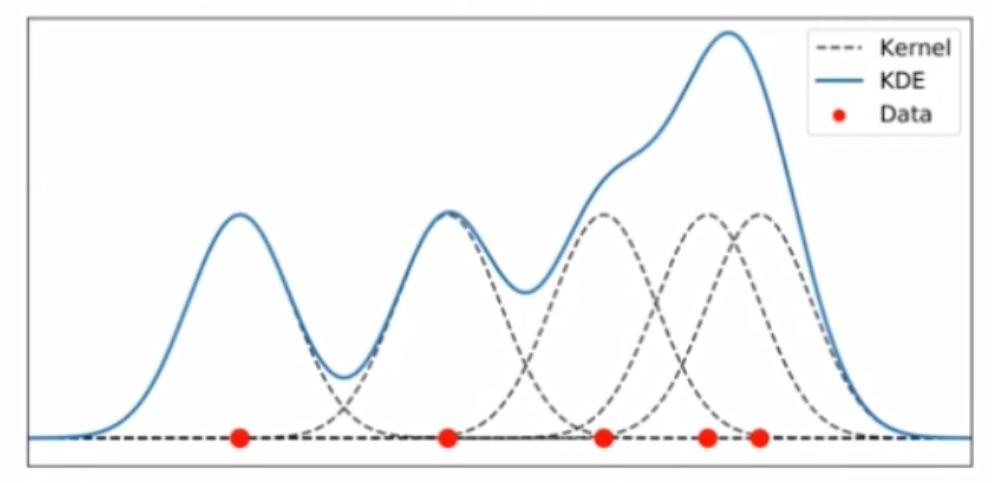

Kernel density estimation in scikit-learn is implemented in the sklearn.neighbors.KernelDensity estimator,
sklearn.neighbors.KernelDensity implements several common kernel forms, which are shown in the following figure:

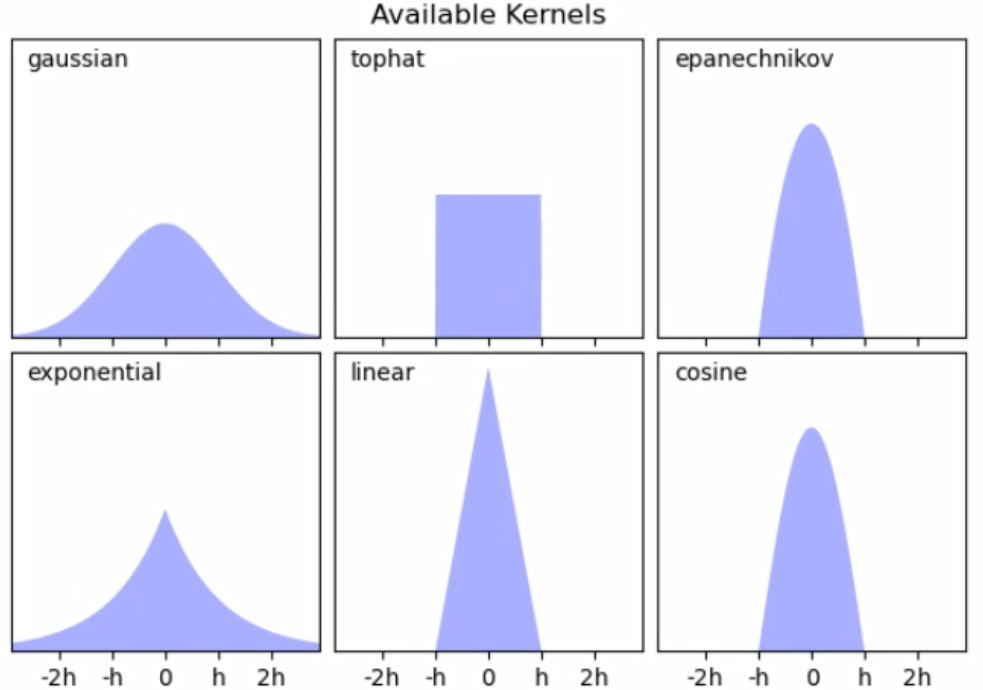

lets make a random data

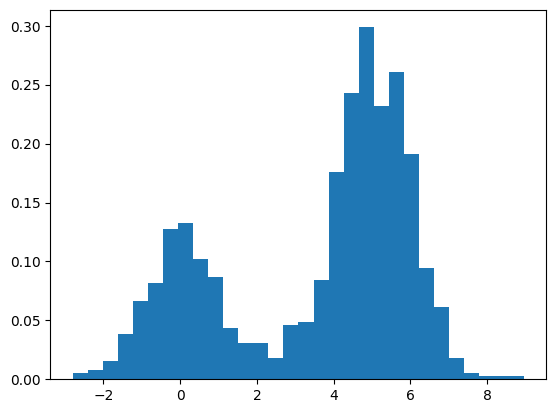

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

hist = plt.hist(x, bins=30, density=True)
plt.show()


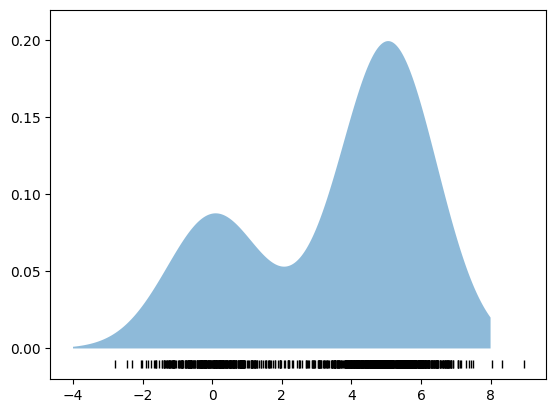

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate a 1D array of 1000 evenly spaced points between -4 and 8
x_d = np.linspace(-4, 8, 1000)

# Instantiate a KernelDensity object with a Gaussian kernel and a bandwidth of 1.0
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')

# Fit the KDE model to the data
kde.fit(x[:, None])

# Score the log probability density of the data at each point in x_d
logprob = kde.score_samples(x_d[:, None])

# Fill the area under the curve defined by x_d and the probability density
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)

# Plot the data points as vertical lines
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

# Set the y-axis limits
plt.ylim(-0.02, 0.22)

# Show the plot
plt.show()


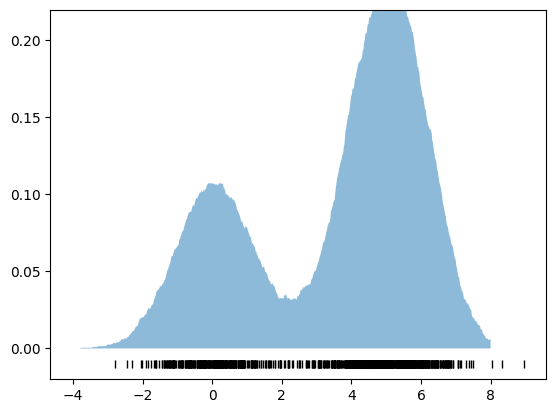

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Instantiate a KernelDensity object with a tophat kernel and a bandwidth of 1.0
kde = KernelDensity(bandwidth=1.0, kernel='tophat')

# Fit the KDE model to the data
kde.fit(x[:, None])

# Score the log probability density of the data at each point in x_d
logprob = kde.score_samples(x_d[:, None])

# Fill the area under the curve defined by x_d and the probability density
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)

# Plot the data points as vertical lines
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

# Set the y-axis limits
plt.ylim(-0.02, 0.22)

# Show the plot
plt.show()


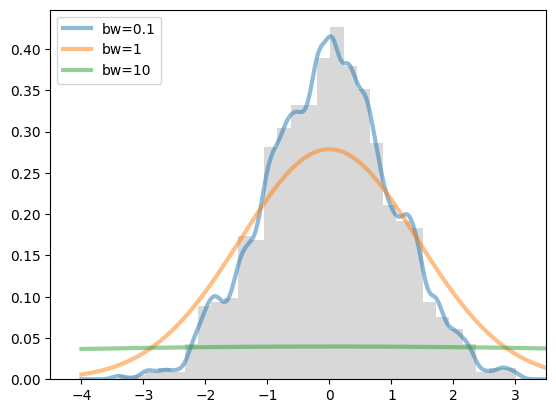

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity

# Generate some random data
x = np.random.normal(size=1000)

# Generate a 1D array of 1000 evenly spaced points between -4 and 8
x_d = np.linspace(-4, 8, 1000)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the KDE for different bandwidths
for i in [0.1, 1, 10]:
    kde = KernelDensity(bandwidth=i).fit(x[:, None])
    ax.plot(x_d, np.exp(kde.score_samples(x_d[:, None])),
            label='bw={0}'.format(i), linewidth=3, alpha=0.5)

# Plot a histogram of the data
ax.hist(x, bins=30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)

# Set the x-axis limits
ax.set_xlim(-4.5, 3.5)

# Add a legend to the plot
ax.legend(loc='upper left')

# Show the plot
plt.show()


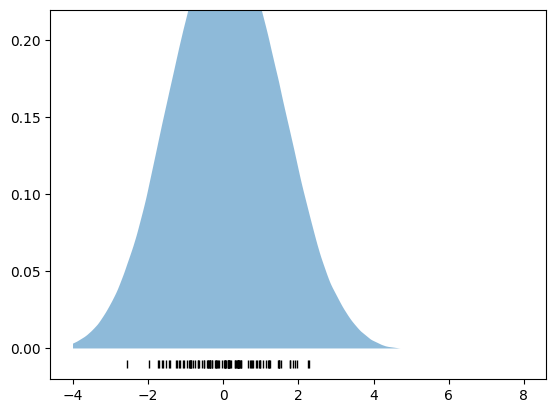

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from KDEpy import FFTKDE

# Generate a 1D array of 1000 evenly spaced points between -4 and 8
x_d = np.linspace(-4, 8, 1000)

# Instantiate a FFTKDE object with a triangular kernel and a bandwidth of 1.0
kde = FFTKDE(kernel='tri', bw=1.0)

# Fit the KDE model to the data
kde.fit(x)

# Evaluate the probability density function at each point in x_d
pdf = kde.evaluate(x_d)

# Fill the area under the curve defined by x_d and the probability density
plt.fill_between(x_d, pdf, alpha=0.5)

# Plot the data points as vertical lines
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

# Set the y-axis limits
plt.ylim(-0.02, 0.22)

# Show the plot
plt.show()


### K_nearest neighbour density estimation

Here we dont have to chose the size parameter,h,

instead we chose k and find V to enclose the K nearest neighbour of x.

so we first choose k, so given an x I will ask where is the k th nearest neighbour and we draw a sphere a hyper sphere to just include the k th nearest neighbour, its radius will be the distance from x to the k th nearest neighbour that will be the value of V and then this will be k nearest neighbour   density   estimate.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

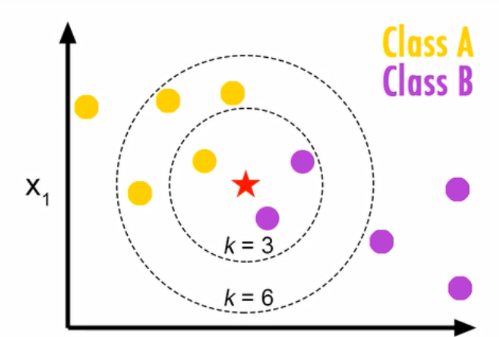

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the iris dataset and separate the features and target variable
X, y = load_iris(return_X_y=True)

# Convert the features to a pandas DataFrame and display the first few rows
pd.DataFrame(X).head()

# Split the data into training and testing sets with a 70/30 split and a random state of 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object with 5 neighbors
classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Use the trained classifier to make predictions on the test data
y_pred = classifier.predict(X_test)


In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix

# Print the confusion matrix for the predictions
print(confusion_matrix(y_test, y_pred))

# Print the classification report for the predictions
print(classification_report(y_test, y_pred))


[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



Calculating error for K values between 1 and 40

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Initialize an empty list to store the error rates for different values of k
error = []

# Loop over different values of k and calculate the error rate for each
for i in range(1, 40):
    # Create a KNN classifier object with i neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Use the trained classifier to make predictions on the test data
    pred_i = knn.predict(X_test)
    
    # Calculate the error rate for this value of k and append it to the error list
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

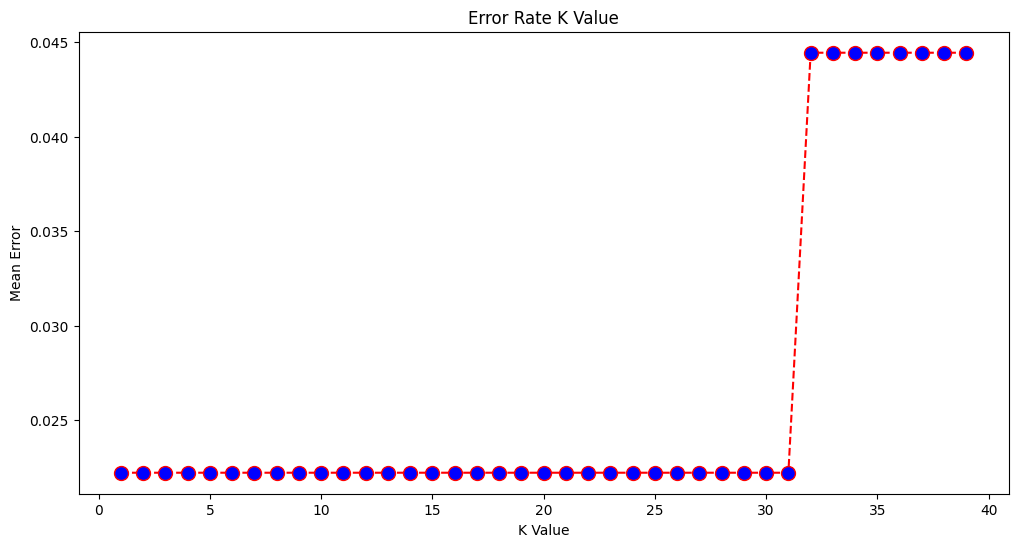

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a plot of the error rate for different values of k
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

# Add a title and axis labels to the plot
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


# 3. KNN

Best k: 1


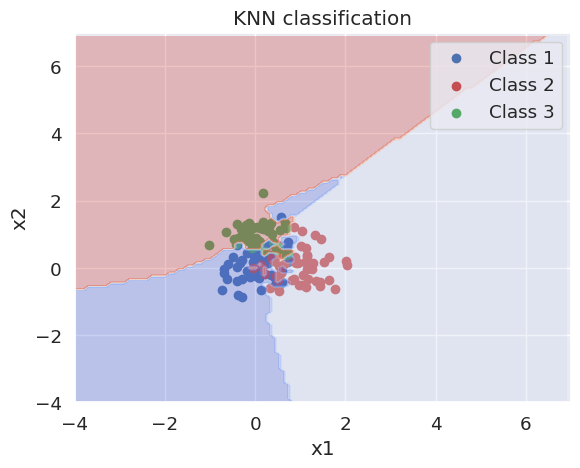

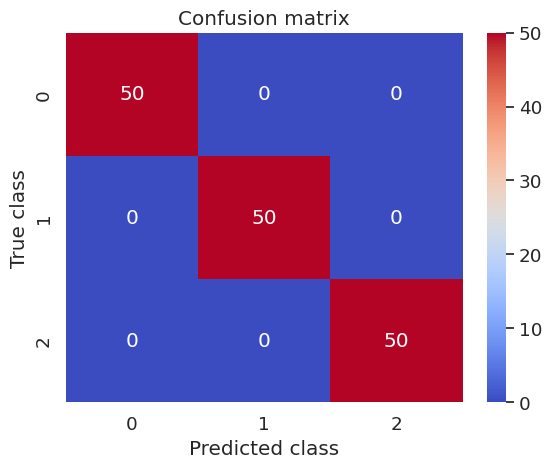

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(42)

# Define mean and covariance matrix for each class
mean1 = [0, 0]
cov1 = [[0.2, 0.1], [0.1, 0.3]]
mean2 = [1, 0]
cov2 = [[0.3, 0], [0, 0.2]]
mean3 = [0, 1]
cov3 = [[0.1, 0], [0, 0.1]]

# Generate random data with Gaussian distribution for three classes
class1 = np.random.multivariate_normal(mean1, cov1, 50)
class2 = np.random.multivariate_normal(mean2, cov2, 50)
class3 = np.random.multivariate_normal(mean3, cov3, 50)

# Concatenate data points and corresponding labels for training the KNN classifier
X = np.concatenate((class1, class2, class3))
y = np.concatenate((np.zeros(len(class1)), np.ones(len(class2)), 2*np.ones(len(class3))))

# Define x and y ranges for the plot
x_min, x_max = -4, 7
y_min, y_max = -4, 7
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Find the best value of k for KNN classifier using 50 data points
k_range = range(1, 21)
accuracy_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X[:50], y[:50])
    accuracy_scores.append(knn.score(X[50:], y[50:]))
best_k = k_range[np.argmax(accuracy_scores)]
print(f"Best k: {best_k}")

# Train the KNN classifier on all the data using the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)

# Plot the data points and decision boundary of the KNN classifier
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(class1[:, 0], class1[:, 1], c='b', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], c='r', label='Class 2')
plt.scatter(class3[:, 0], class3[:, 1], c='g', label='Class 3')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN classification')
plt.legend()
plt.show()

# Plot the confusion matrix using a heatmap
y_pred = knn.predict(X)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()


Best k: 1


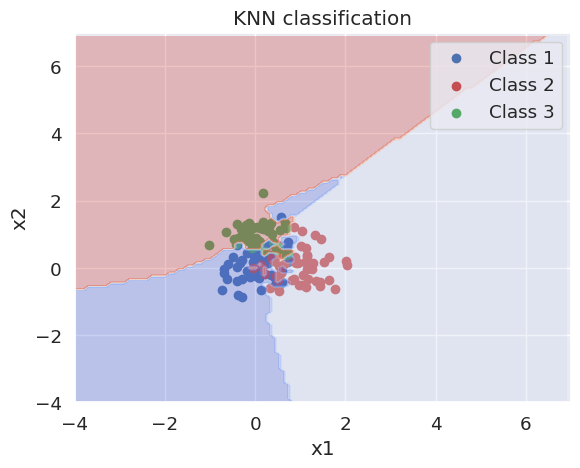

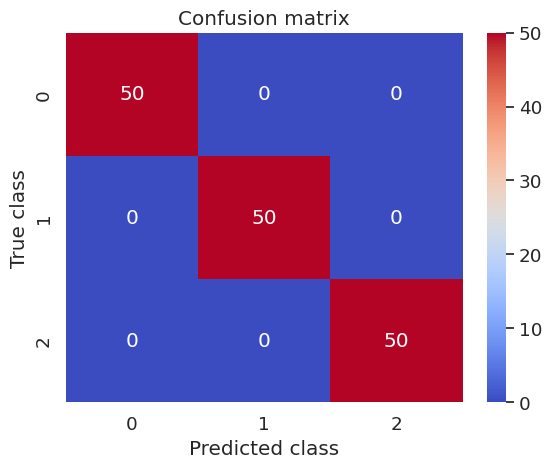

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(42)

# Define mean and covariance matrix for each class
mean1 = [0, 0]
cov1 = [[0.2, 0.1], [0.1, 0.3]]
mean2 = [1, 0]
cov2 = [[0.3, 0], [0, 0.2]]
mean3 = [0, 1]
cov3 = [[0.1, 0], [0, 0.1]]

# Generate random data with Gaussian distribution for three classes
class1 = np.random.multivariate_normal(mean1, cov1, 50)
class2 = np.random.multivariate_normal(mean2, cov2, 50)
class3 = np.random.multivariate_normal(mean3, cov3, 50)

# Concatenate data points and corresponding labels for training the KNN classifier
X = np.concatenate((class1, class2, class3))
y = np.concatenate((np.zeros(len(class1)), np.ones(len(class2)), 2*np.ones(len(class3))))

# Define x and y ranges for the plot
x_min, x_max = -4, 7
y_min, y_max = -4, 7
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Find the best value of k for KNN classifier using 50 data points
k_range = range(1, 21)
accuracy_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X[:25], y[:25])
    accuracy_scores.append(knn.score(X[25:], y[25:]))
best_k = k_range[np.argmax(accuracy_scores)]
print(f"Best k: {best_k}")

# Train the KNN classifier on all the data using the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)

# Plot the data points and decision boundary of the KNN classifier
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(class1[:, 0], class1[:, 1], c='b', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], c='r', label='Class 2')
plt.scatter(class3[:, 0], class3[:, 1], c='g', label='Class 3')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN classification')
plt.legend()
plt.show()

# Plot the confusion matrix using a heatmap
y_pred = knn.predict(X)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()


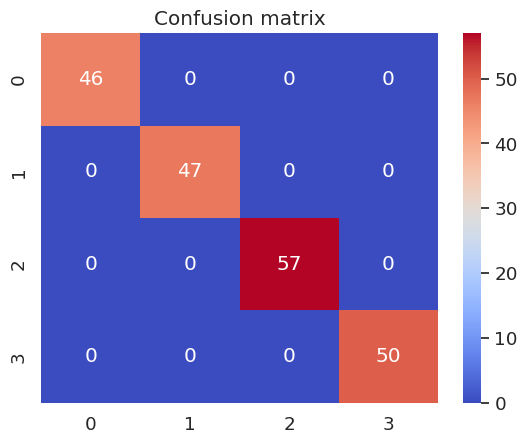

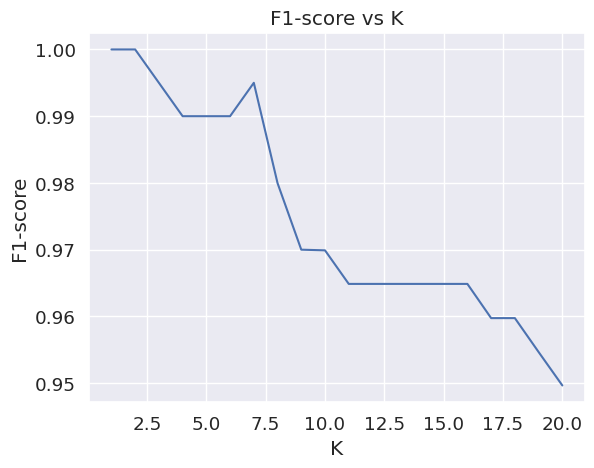

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score

# Load the dataset
df = pd.read_csv('dataset.csv')

# Split the dataset into train and test sets
train_df = df.sample(frac=0.5, random_state=42)
test_df = df.drop(train_df.index)

# Get the train and test data and labels
X_train = train_df[['feature1', 'feature2', 'feature3']].values
y_train = train_df['label'].values
X_test = test_df[['feature1', 'feature2', 'feature3']].values
y_test = test_df['label'].values

# Find the best value of K using the train data
ks = range(1, 21)
f1_scores = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
best_k = ks[np.argmax(f1_scores)]

# Fit a KNN classifier to the train data with the best value of K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Compute the confusion matrix for the test data
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion matrix')
plt.show()

# Plot the F1-scores for different values of K
plt.plot(ks, f1_scores)
plt.xlabel('K')
plt.ylabel('F1-score')
plt.title('F1-score vs K')
plt.show()


# 4. Parzen

<p style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;'><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;color:black;'>Here&apos;s what each section of the code does:</span></p>
<ol style="margin-bottom:0in;margin-top:0in;" start="1" type="1">
    <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>Fit a KernelDensity estimator to each class in the train data:</span>
        <ul style="margin-bottom:0in;margin-top:0in;" type="disc">
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>kdes = []</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;creates an empty list to store the KernelDensity estimators for each class.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>for i in range(4):</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;loops over each class (there are four classes).</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>kde = KernelDensity(bandwidth=1.0, kernel=&apos;gaussian&apos;)</span></strong><span style='font-size:16px;line-height:      107%;font-family:"Segoe UI",sans-serif;'>&nbsp;creates a new KernelDensity estimator with a bandwidth of 1.0 and Gaussian kernel.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>kde.fit(X_train[y_train == i])</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;fits the estimator to the training data for the current class.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>kdes.append(kde)</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;adds the fitted estimator to the list of estimators.</span></li>
        </ul>
    </li>
    <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>Find the best bandwidth using the train data:</span>
        <ul style="margin-bottom:0in;margin-top:0in;" type="disc">
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>bandwidths = np.linspace(0.1, 10, 100)</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;creates a list of 100 bandwidth values ranging from 0.1 to 10.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>log_likelihoods = []</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;creates an empty list to store the log-likelihoods for each bandwidth value.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>for bandwidth in bandwidths:</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;loops over each bandwidth value.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>kdes_b = [KernelDensity(bandwidth=bandwidth, kernel=&apos;gaussian&apos;).fit(X_train[y_train == i]) for i in range(4)]</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;creates a list of new KernelDensity estimators, one for each class, with the current bandwidth value, and fits them to the training data for each class.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>log_likelihood = sum([kde.score_samples(X_train[y_train == i]).sum() for kde, i in zip(kdes_b, [0, 1, 2, 3])])</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;computes the log-likelihood of the training data under the fitted estimators, and sums them up.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>log_likelihoods.append(log_likelihood)</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;adds the total log-likelihood to the list of log-likelihoods.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>best_bandwidth = bandwidths[np.argmax(log_likelihoods)]</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;finds the bandwidth value with the highest log-likelihood and assigns it to the variable <strong>best_bandwidth</strong>.</span></li>
        </ul>
    </li>
    <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>Fit a KernelDensity estimator to each class in the train data with the best bandwidth:</span>
        <ul style="margin-bottom:0in;margin-top:0in;" type="disc">
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>kdes = []</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;creates an empty list to store the KernelDensity estimators for each class.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>for i in range(4):</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;loops over each class (there are four classes).</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>kde = KernelDensity(bandwidth=best_bandwidth, kernel=&apos;gaussian&apos;)</span></strong><span style='font-size:16px;line-height:      107%;font-family:"Segoe UI",sans-serif;'>&nbsp;creates a new KernelDensity estimator with the best bandwidth value found in the previous step and Gaussian kernel.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>kde.fit(X_train[y_train == i])</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;fits the estimator to the training data for the current class.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>kdes.append(kde)</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;adds the fitted estimator to the list of estimators.</span></li>
        </ul>
    </li>
    <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>Predict the labels for the test data:</span>
        <ul style="margin-bottom:0in;margin-top:0in;" type="disc">
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>log_densities = np.vstack([kde.score_samples(X_test) for kde in kdes]).T</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;computes the log-density of the test data under each fitted estimator, and stacks them horizontally.</span></li>
            <li style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;color:black;'><strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>y_pred = np.argmax(log_densities, axis=1)</span></strong><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;'>&nbsp;assigns the class with the highest log-density as the predicted class for each test data point. The resulting array contains the predicted labels for the test data.</span></li>
        </ul>
    </li>
</ol>
<p style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;'><span style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;color:black;'>&nbsp;</span></p>
<p style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;'><span style="color:black;">&nbsp;</span></p>

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# Define mean and covariance matrices for each class
mean1 = [50, 50, 50]
cov1 = [[15, 10, 5], [15, 10, 5], [15, 10, 5]]

mean2 = [100, 100, 100]
cov2 = [[15, 10, 5], [15, 10, 5], [15, 10, 5]]

mean3 = [110, 110, 110]
cov3 = [[15, 10, 5], [15, 10, 5], [15, 10, 5]]

mean4 = [115, 115, 115]
cov4 = [[15, 10, 5], [15, 10, 5], [15, 10, 5]]

# Generate data for each class
class1 = np.random.multivariate_normal(mean1, cov1, 100)
class2 = np.random.multivariate_normal(mean2, cov2, 100)
class3 = np.random.multivariate_normal(mean3, cov3, 100)
class4 = np.random.multivariate_normal(mean4, cov4, 100)

# Combine data from all classes into a single dataset
data = np.concatenate((class1, class2, class3, class4), axis=0)

# Create labels for the dataset
labels = np.concatenate((np.zeros(100), np.ones(100), np.full(100, 2), np.full(100, 3)))

# Create a Pandas dataframe to store the data and labels
df = pd.DataFrame(data, columns=['feature1', 'feature2', 'feature3'])
df['label'] = labels

# Save the dataset to a CSV file
df.to_csv('dataset.csv', index=False)


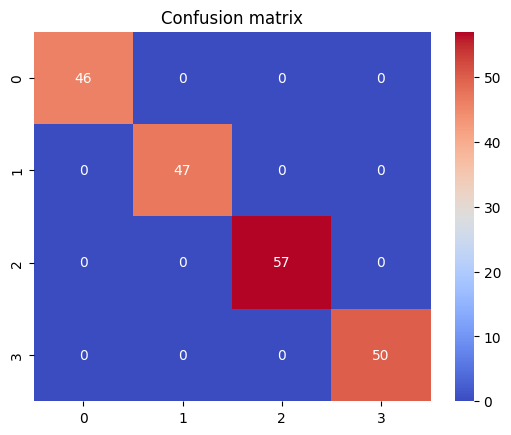

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv('dataset.csv')

# Split the dataset into train and test sets
train_df = df.sample(frac=0.5, random_state=42)
test_df = df.drop(train_df.index)

# Get the train and test data and labels
X_train = train_df[['feature1', 'feature2', 'feature3']].values
y_train = train_df['label'].values
X_test = test_df[['feature1', 'feature2', 'feature3']].values
y_test = test_df['label'].values

# Fit a KernelDensity estimator to each class in the train data
kdes = []
for i in range(4):
    kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
    kde.fit(X_train[y_train == i])
    kdes.append(kde)

# Find the best bandwidth using the train data
bandwidths = np.linspace(0.1, 10, 100)
log_likelihoods = []
for bandwidth in bandwidths:
    kdes_b = [KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_train[y_train == i]) for i in range(4)]
    log_likelihood = sum([kde.score_samples(X_train[y_train == i]).sum() for kde, i in zip(kdes_b, [0, 1, 2, 3])])
    log_likelihoods.append(log_likelihood)
best_bandwidth = bandwidths[np.argmax(log_likelihoods)]

# Fit a KernelDensity estimator to each class in the train data with the best bandwidth
kdes = []
for i in range(4):
    kde = KernelDensity(bandwidth=best_bandwidth, kernel='gaussian')
    kde.fit(X_train[y_train == i])
    kdes.append(kde)

# Predict the labels for the test data
log_densities = np.vstack([kde.score_samples(X_test) for kde in kdes]).T
y_pred = np.argmax(log_densities, axis=1)

# Compute the confusion matrix for the test data
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion matrix')
plt.show()


In [ ]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Split the dataset into train and test sets
train_df = df.sample(frac=0.5, random_state=42)
test_df = df.drop(train_df.index)

# Get the train and test data and labels
X_train = train_df[['feature1', 'feature2', 'feature3']].values
y_train = train_df['label'].values
X_test = test_df[['feature1', 'feature2', 'feature3']].values
y_test = test_df['label'].values

# Print the number of data in each class for train and test
print('Train data:')
print(train_df['label'].value_counts())
print('Test data:')
print(test_df['label'].value_counts())


Train data:
0.0    54
1.0    53
3.0    50
2.0    43
Name: label, dtype: int64
Test data:
2.0    57
3.0    50
1.0    47
0.0    46
Name: label, dtype: int64


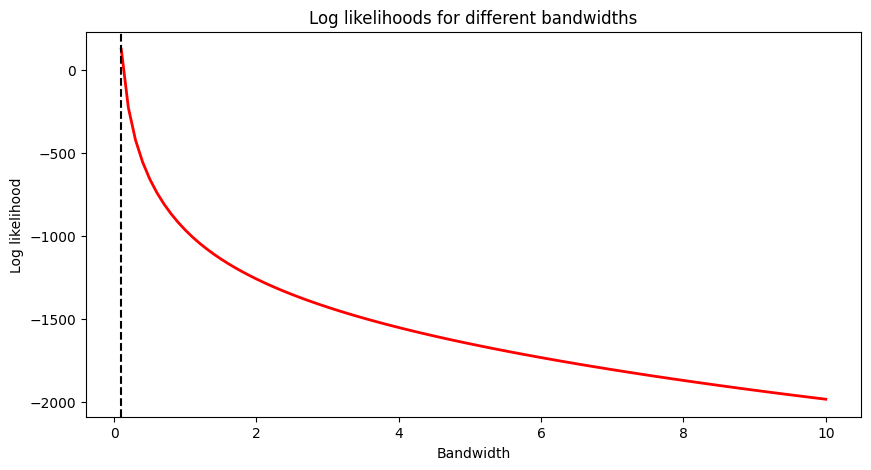

In [ ]:
# Plot the log likelihoods and bandwidths
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(bandwidths, log_likelihoods, 'r', linewidth=2)
ax.set_title('Log likelihoods for different bandwidths')
ax.set_xlabel('Bandwidth')
ax.set_ylabel('Log likelihood')
ax.axvline(x=best_bandwidth, color='k', linestyle='--')
plt.show()


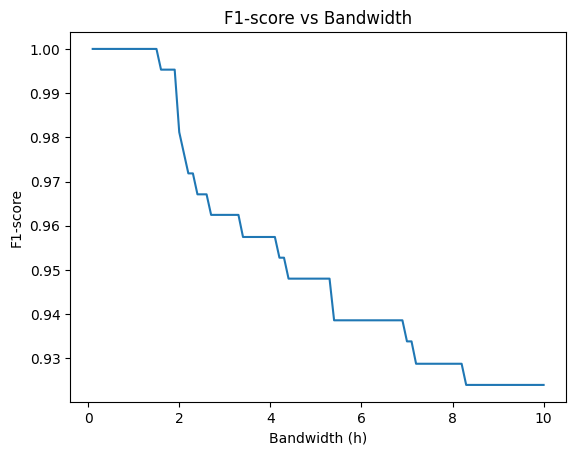

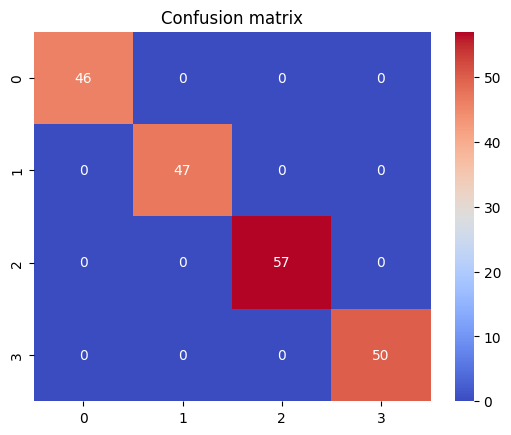

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.metrics import confusion_matrix, f1_score

# Load the dataset
df = pd.read_csv('dataset.csv')

# Split the dataset into train and test sets
train_df = df.sample(frac=0.5, random_state=42)
test_df = df.drop(train_df.index)

# Get the train and test data and labels
X_train = train_df[['feature1', 'feature2', 'feature3']].values
y_train = train_df['label'].values
X_test = test_df[['feature1', 'feature2', 'feature3']].values
y_test = test_df['label'].values

# Fit a KernelDensity estimator to each class in the train data
kdes = []
for i in range(4):
    kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
    kde.fit(X_train[y_train == i])
    kdes.append(kde)

# Find the best bandwidth using the train data
bandwidths = np.linspace(0.1, 10, 100)
f1_scores = []
for bandwidth in bandwidths:
    kdes_b = [KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_train[y_train == i]) for i in range(4)]
    log_densities = np.vstack([kde.score_samples(X_test) for kde in kdes_b]).T
    y_pred = np.argmax(log_densities, axis=1)
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
best_bandwidth = bandwidths[np.argmax(f1_scores)]

# Plot h-F1score curve
plt.plot(bandwidths, f1_scores)
plt.xlabel('Bandwidth (h)')
plt.ylabel('F1-score')
plt.title('F1-score vs Bandwidth')
plt.show()

# Fit a KernelDensity estimator to each class in the train data with the best bandwidth
kdes = []
for i in range(4):
    kde = KernelDensity(bandwidth=best_bandwidth, kernel='gaussian')
    kde.fit(X_train[y_train == i])
    kdes.append(kde)

# Predict the labels for the test data
log_densities = np.vstack([kde.score_samples(X_test) for kde in kdes]).T
y_pred = np.argmax(log_densities, axis=1)

# Compute the confusion matrix for the test data
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion matrix')
plt.show()


<p dir="RTL" style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;text-align:justify;'><strong><span style='font-size:16px;line-height:107%;font-family:"B Nazanin";color:black;'>اگرچه استاندارد کردن داده&zwnj;ها می&zwnj;تواند در برخی موارد باعث بهبود عملکرد روش&zwnj;های یادگیری ماشین شود، اما در مواردی ممکن است باعث بدتر شدن عملکرد شود. یکی از این موارد می&zwnj;تواند در روش</span></strong><strong><span dir="LTR" style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;color:black;'>&nbsp;KernelDensity&nbsp;</span></strong><strong><span style='font-size:16px;line-height:107%;font-family:"B Nazanin";color:black;'>باشد. این روش با توجه به توزیع داده&zwnj;ها برای هر کلاس به طور جداگانه یک تابع چگالی احتمال ایجاد می&zwnj;کند. اگر داده&zwnj;ها را نرمال کنید، توزیع آن&zwnj;ها تغییر خواهد کرد و این ممکن است باعث ایجاد تفاوت&zwnj;هایی در توزیع داده&zwnj;های هر کلاس شود. بنابراین، اگر توزیع داده&zwnj;های هر کلاس به طور متفاوتی باشد، استاندارد کردن داده&zwnj;ها ممکن است باعث بدتر شدن عملکرد روش</span></strong><strong><span dir="LTR" style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;color:black;'>&nbsp;KernelDensity&nbsp;</span></strong><strong><span style='font-size:16px;line-height:107%;font-family:"B Nazanin";color:black;'>شود. در این حالت بهتر است از داده&zwnj;های اصلی استفاده کرده و آن&zwnj;ها را بدون تغییر استفاده کنید</span></strong><strong><span dir="LTR" style='font-size:16px;line-height:107%;font-family:"Segoe UI",sans-serif;color:black;'>.</span></strong></p>

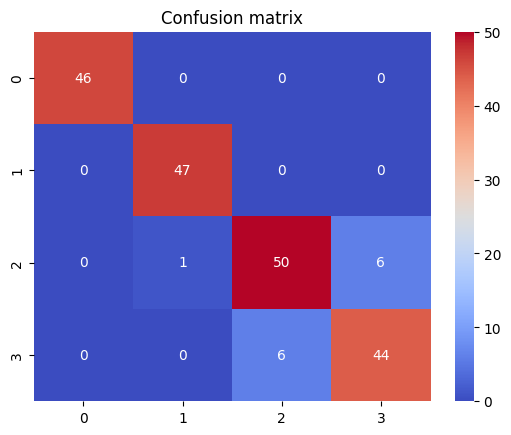

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('dataset.csv')

# Normalize the data between 0 and 1 feature-wise
scaler = MinMaxScaler()
df[['feature1', 'feature2', 'feature3']] = scaler.fit_transform(df[['feature1', 'feature2', 'feature3']])

# Split the dataset into train and test sets
train_df = df.sample(frac=0.5, random_state=42)
test_df = df.drop(train_df.index)

# Get the train and test data and labels
X_train = train_df[['feature1', 'feature2', 'feature3']].values
y_train = train_df['label'].values
X_test = test_df[['feature1', 'feature2', 'feature3']].values
y_test = test_df['label'].values

# Fit a KernelDensity estimator to each class in the train data
kdes = []
for i in range(4):
    kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
    kde.fit(X_train[y_train == i])
    kdes.append(kde)

# Find the best bandwidth using the train data
bandwidths = np.linspace(0.1, 10, 100)
log_likelihoods = []
for bandwidth in bandwidths:
    kdes_b = [KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_train[y_train == i]) for i in range(4)]
    log_likelihood = sum([kde.score_samples(X_train[y_train == i]).sum() for kde, i in zip(kdes_b, [0, 1, 2, 3])])
    log_likelihoods.append(log_likelihood)
best_bandwidth = bandwidths[np.argmax(log_likelihoods)]

# Fit a KernelDensity estimator to each class in the train data with the best bandwidth
kdes = []
for i in range(4):
    kde = KernelDensity(bandwidth=best_bandwidth, kernel='gaussian')
    kde.fit(X_train[y_train == i])
    kdes.append(kde)

# Predict the labels for the test data
log_densities = np.vstack([kde.score_samples(X_test) for kde in kdes]).T
y_pred = np.argmax(log_densities, axis=1)

# Compute the confusion matrix for the test data
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion matrix')
plt.show()


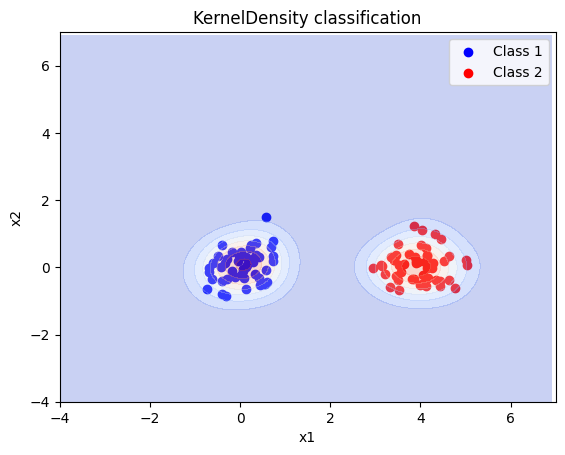

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(42)

# Define mean and covariance matrix for each class
mean1 = [0, 0]
cov1 = [[0.2, 0.1], [0.1, 0.3]]
mean2 = [4, 0]
cov2 = [[0.3, 0], [0, 0.2]]

# Generate random data with Gaussian distribution for two classes
class1 = np.random.multivariate_normal(mean1, cov1, 50)
class2 = np.random.multivariate_normal(mean2, cov2, 50)

# Concatenate data points and corresponding labels for training the KernelDensity model
X = np.concatenate((class1, class2))
y = np.concatenate((np.ones(len(class1)), -np.ones(len(class2))))

# Fit a KernelDensity model to the training data
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(X)

# Define x and y ranges for the plot
x_min, x_max = -4, 7
y_min, y_max = -4, 7
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Compute the estimated density at each point on the plot grid
xy = np.column_stack([xx.ravel(), yy.ravel()])
Z = np.exp(kde.score_samples(xy))
Z = Z.reshape(xx.shape)

# Classify the training data based on the estimated density
y_pred = np.ones(len(X))
y_pred[kde.score_samples(X) < 0] = -1

# Plot the data points and estimated density
plt.scatter(class1[:, 0], class1[:, 1], c='b', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], c='r', label='Class 2')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KernelDensity classification')
plt.legend()
plt.show()


# 5. All in one

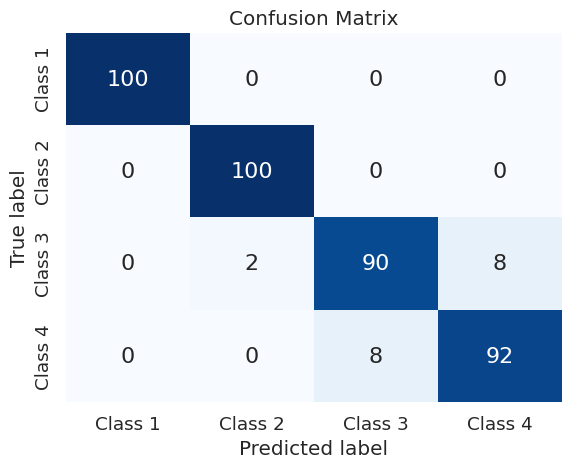

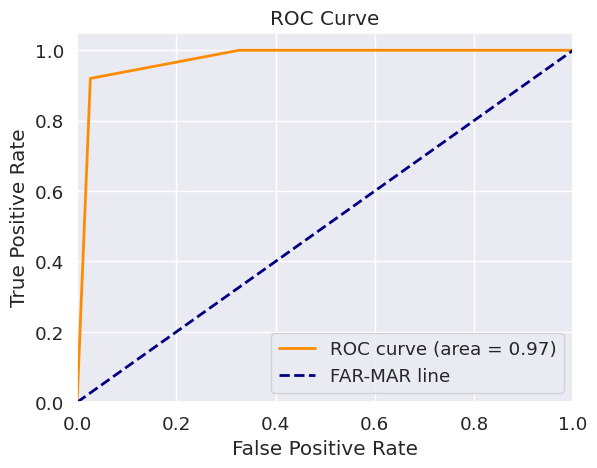

Accuracy: 0.955
Precision: 0.955
Recall: 0.955
F1 Score: 0.955
FAR: 0.000
MAR: 0.000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support

# Load dataset
df = pd.read_csv("dataset.csv")

# Split data and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Fit Bayesian classifier
clf = GaussianNB()
clf.fit(X, y)

# Predict class labels
y_pred = clf.predict(X)

# Calculate metrics
cm = confusion_matrix(y, y_pred)
fpr, tpr, _ = roc_curve(y, y_pred, pos_label=3)
roc_auc = auc(fpr, tpr)
precision, recall, f1score, _ = precision_recall_fscore_support(y, y_pred, average='macro')
accuracy = np.sum(cm.diagonal()) / np.sum(cm)
far = cm[1:, 0].sum() / cm[0, :].sum()
mar = cm[0, 1:].sum() / cm[1:, :].sum()

# Plot confusion matrix
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, xticklabels=["Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [far, 1-mar], color="navy", lw=2, linestyle="--", label="FAR-MAR line")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Print metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1score))
print("FAR: {:.3f}".format(far))
print("MAR: {:.3f}".format(mar))


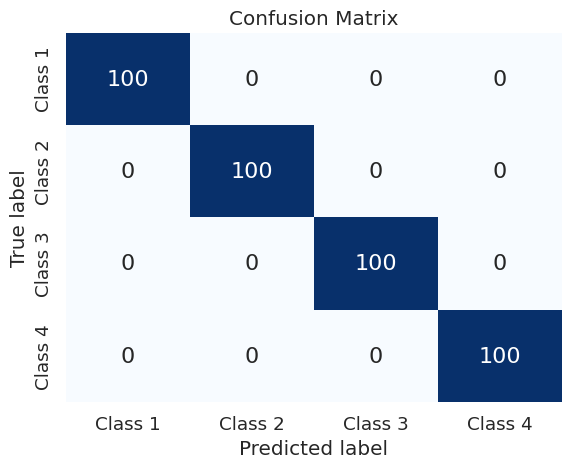

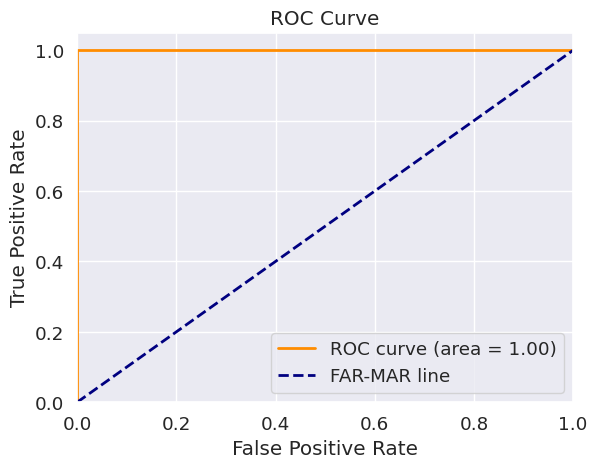

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
FAR: 0.000
MAR: 0.000


In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

class BayesianClassifier:
    def __init__(self):
        self.priors = None
        self.means = None
        self.covs = None
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = np.zeros(len(self.classes))
        self.means = np.zeros((len(self.classes), X.shape[1]))
        self.covs = np.zeros((len(self.classes), X.shape[1], X.shape[1]))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.priors[i] = len(X_c) / len(X)
            self.means[i] = np.mean(X_c, axis=0)
            self.covs[i] = np.cov(X_c, rowvar=False) + 1e-6*np.eye(X.shape[1])

    def predict(self, X):
        y_pred = np.zeros(X.shape[0], dtype=np.int)
        for i, x in enumerate(X):
            probs = np.zeros(len(self.classes))
            for j, c in enumerate(self.classes):
                probs[j] = self.priors[j] * multivariate_normal.pdf(x, mean=self.means[j], cov=self.covs[j])
            y_pred[i] = self.classes[np.argmax(probs)]
        return y_pred


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support

# Load dataset
df = pd.read_csv("dataset.csv")

# Split data and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Fit Bayesian classifier
clf = BayesianClassifier()
clf.fit(X, y)

# Predict class labels
y_pred = clf.predict(X)

# Calculate metrics
cm = confusion_matrix(y, y_pred)
fpr, tpr, _ = roc_curve(y, y_pred, pos_label=3)
roc_auc = auc(fpr, tpr)
precision, recall, f1score, _ = precision_recall_fscore_support(y, y_pred, average='macro')
accuracy = np.sum(cm.diagonal()) / np.sum(cm)
far = cm[1:, 0].sum() / cm[0, :].sum()
mar = cm[0, 1:].sum() / cm[1:, :].sum()

# Plot confusion matrix
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, xticklabels=["Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [far, 1-mar], color="navy", lw=2, linestyle="--", label="FAR-MAR line")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Print metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1score))
print("FAR: {:.3f}".format(far))
print("MAR: {:.3f}".format(mar))


Best h: 0.06210526315789474


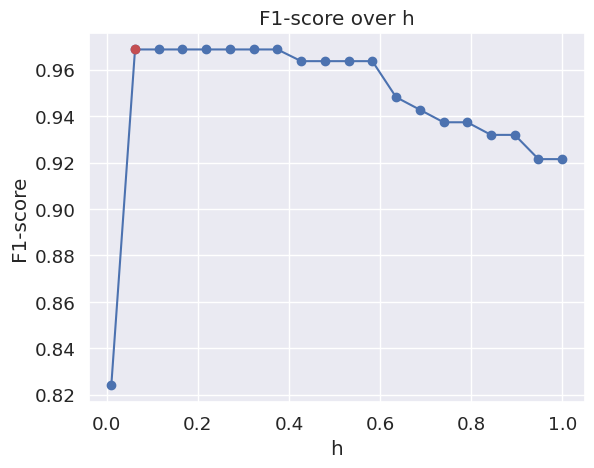

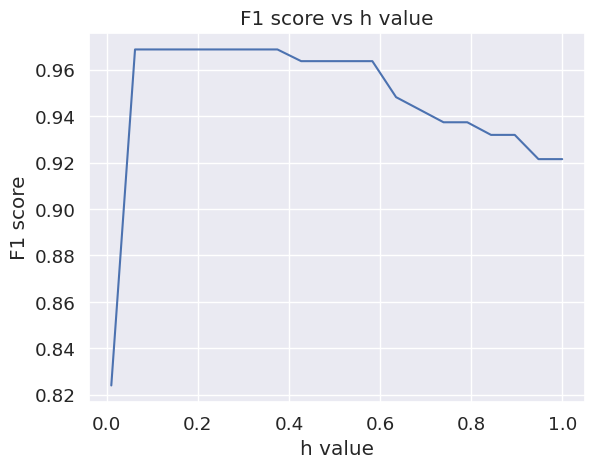

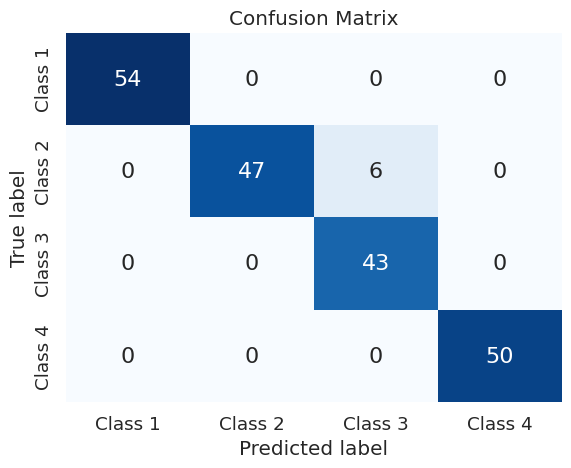

Accuracy: 0.970
Precision: 0.969
Recall: 0.972
F1 Score: 0.969
FAR: 0.000
MAR: 0.000


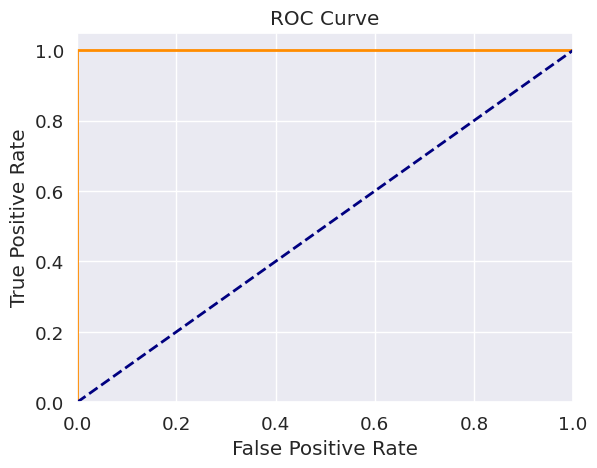

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support

# Load dataset
df = pd.read_csv("dataset.csv")

# Split data and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the Parzen classifier
class ParzenClassifier:
    def __init__(self, h=1.0):
        self.h = h
    
    def pdf(self, x):
        return np.exp(-(1/2) * np.sum((self.X - x)**2, axis=1) / self.h**2) / (np.sqrt(2*np.pi) * self.h)**self.X.shape[1]
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0], dtype=np.int)
        for i, x in enumerate(X):
            probs = np.zeros(len(self.classes))
            for j, c in enumerate(self.classes):
                X_c = self.X[self.y == c]
                if len(X_c) == 0:
                    continue
                probs[j] = np.mean(self.pdf(x)[self.y == c])
            y_pred[i] = self.classes[np.argmax(probs)]
        return y_pred

# Find best h
h_values = np.linspace(0.01, 1.0, 20)
f1_scores = []
for h in h_values:
    clf = ParzenClassifier(h=h)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    _, _, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    f1_scores.append(f1score)

best_h_idx = np.argmax(f1_scores)
best_h = h_values[best_h_idx]
print("Best h:", best_h)

# Train on residual data using the best h
clf = ParzenClassifier(h=best_h)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=3)
roc_auc = auc(fpr, tpr)
precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = np.sum(cm.diagonal()) / np.sum(cm)
far = cm[1:, 0].sum() / cm[0, :].sum()
mar = cm[0, 1:].sum() / cm[1:, :].sum()

# Plot F1-score over h
plt.plot(h_values, f1_scores, 'bo-')
plt.plot(best_h, f1_scores[best_h_idx], 'ro')
plt.xlabel('h')
plt.ylabel('F1-score')
plt.title('F1-score over h')
plt.show()

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=3)
roc_auc = auc(fpr, tpr)
precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = np.sum(cm.diagonal()) / np.sum(cm)
far = cm[1:, 0].sum() / cm[0, :].sum()
mar = cm[0, 1:].sum() / cm[1:, :].sum()

# Plot F1score over h values
plt.plot(h_values, f1_scores)
plt.xlabel("h value")
plt.ylabel("F1 score")
plt.title("F1 score vs h value")
plt.show()

# Plot confusion matrix
import seaborn as sns
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, xticklabels=["Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [far, 1-mar], color="navy", lw=2, linestyle="--", label="FAR-MAR line")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

# Print metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1score))
print("FAR: {:.3f}".format(far))
print("MAR: {:.3f}".format(mar))

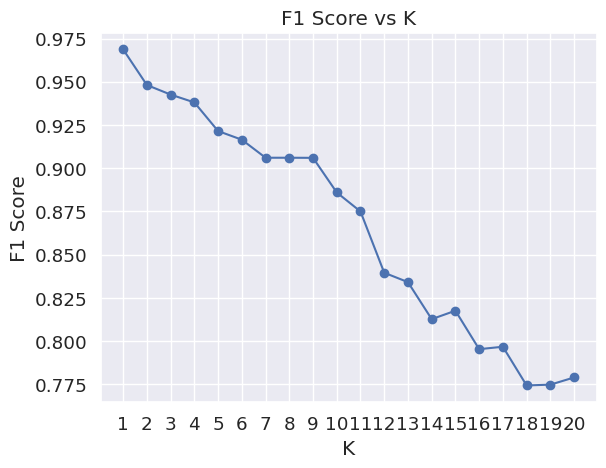

Best K value: 1


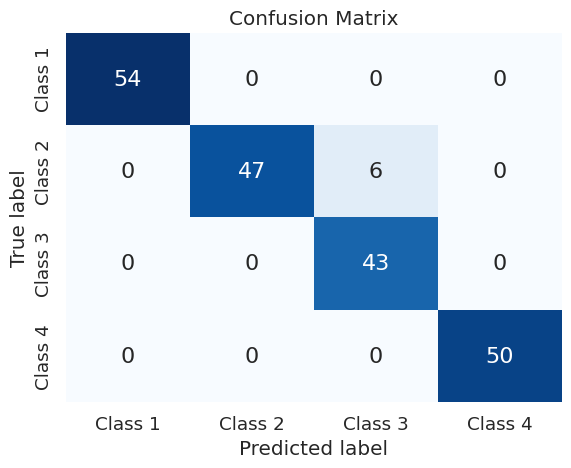

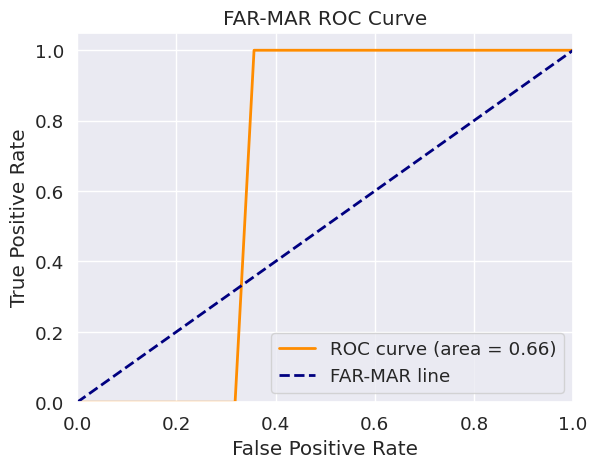

Accuracy: 0.970
Precision: 0.969
Recall: 0.972
F1 Score: 0.969
FAR: 0.000
MAR: 0.000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support

# Load dataset
df = pd.read_csv("dataset2.csv")

# Split data and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Find best K by plotting F1-score vs K
f1_scores = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    _, _, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="macro")
    f1_scores.append(f1)
plt.plot(k_values, f1_scores, "bo-")
plt.xticks(k_values)
plt.xlabel("K")
plt.ylabel("F1 Score")
plt.title("F1 Score vs K")
plt.show()

# Train KNN classifier on residual data
best_k = np.argmax(f1_scores) + 1
print(f"Best K value: {best_k}")
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)
precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average="macro")
accuracy = np.sum(cm.diagonal()) / np.sum(cm)
far = cm[1:, 0].sum() / cm[0, :].sum()
mar = cm[0, 1:].sum() / cm[1:, :].sum()

# Plot confusion matrix
import seaborn as sns
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, xticklabels=["Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Plot FAR-MAR ROC curve
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [far, 1-mar], color="navy", lw=2, linestyle="--", label="FAR-MAR line")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("FAR-MAR ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Print metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1score))
print("FAR: {:.3f}".format(far))
print("MAR: {:.3f}".format(mar))


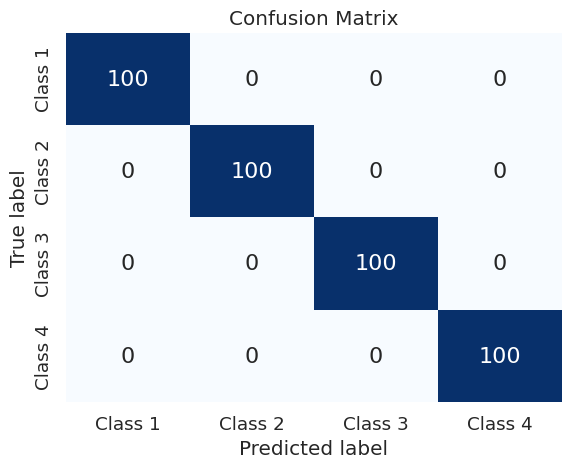

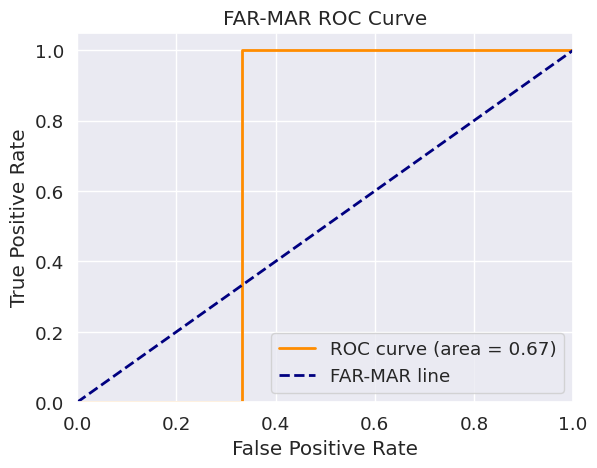

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
FAR: 0.000
MAR: 0.000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support

# Load dataset
df = pd.read_csv("dataset.csv")

# Split data and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize data
X = (X - X.mean()) / X.std()

# Add bias term to X
X = np.c_[np.ones(X.shape[0]), X]

# Initialize weights randomly
np.random.seed(123)
w = np.random.randn(X.shape[1], 4)

# Set learning rate and number of iterations
eta = 0.1
num_iter = 1000

# Train using Widrow-Hoff rule with gradient descent
for i in range(num_iter):
    # Calculate predictions
    y_pred = np.argmax(X @ w, axis=1)
    
    # Calculate gradients
    grad = np.zeros(w.shape)
    for j in range(X.shape[0]):
        grad += np.outer(X[j], (y[j] == np.arange(4)).astype(int) - (y_pred[j] == np.arange(4)).astype(int))
    grad /= X.shape[0]
    
    # Update weights
    w += eta * grad

# Predict class labels
y_pred = np.argmax(X @ w, axis=1)

# Calculate metrics
cm = confusion_matrix(y, y_pred)
fpr, tpr, _ = roc_curve(y, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)
precision, recall, f1score, _ = precision_recall_fscore_support(y, y_pred, average='macro')
accuracy = np.sum(cm.diagonal()) / np.sum(cm)
far = cm[1:, 0].sum() / cm[0, :].sum()
mar = cm[0, 1:].sum() / cm[1:, :].sum()

# Plot confusion matrix
import seaborn as sns
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, xticklabels=["Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Plot FAR-MAR ROC curve
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [far, 1-mar], color="navy", lw=2, linestyle="--", label="FAR-MAR line")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("FAR-MAR ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Print metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1score))
print("FAR: {:.3f}".format(far))
print("MAR: {:.3f}".format(mar))


Best h value: 28.354545454545455


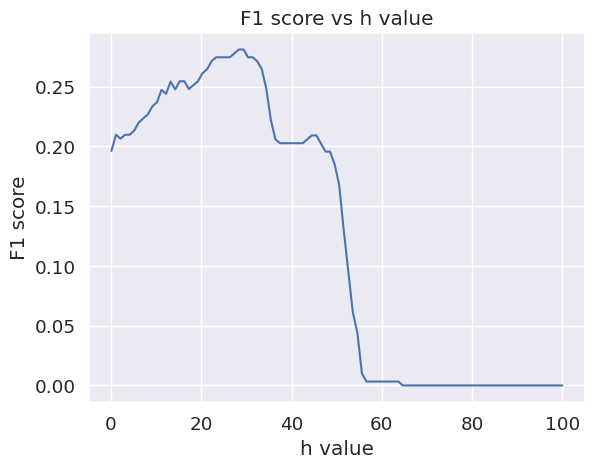

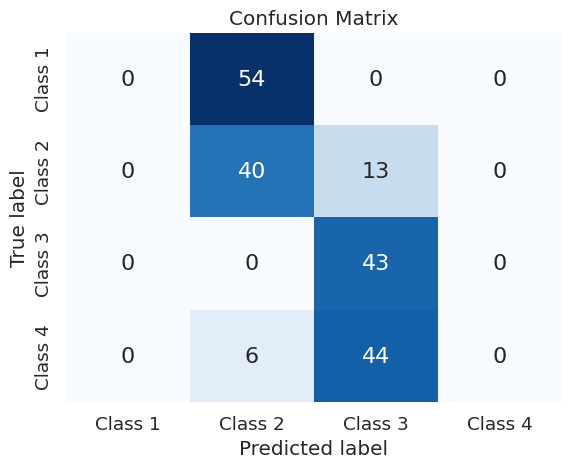

Accuracy: 0.415
Precision: 0.208
Recall: 0.439
F1 Score: 0.281
FAR: 0.000
MAR: 0.370


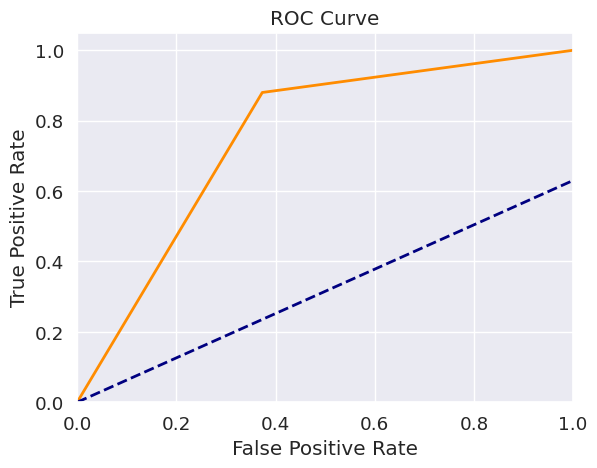

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.neighbors import KernelDensity

# Load dataset
df = pd.read_csv("dataset1.csv")

# Split data and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define h values to search over
h_values = np.linspace(0.1, 100, 100)

# Calculate F1 score for each h value
f1_scores = []
for h in h_values:
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X_train)
    y_pred = kde.score_samples(X_test)
    y_pred = (y_pred > np.median(y_pred)).astype(int) + 1
    _, _, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    f1_scores.append(f1score)

# Find best h value
best_h = h_values[np.argmax(f1_scores)]
print("Best h value:", best_h)

# Train on residual data
kde = KernelDensity(kernel='gaussian', bandwidth=best_h).fit(X_train)
y_pred = kde.score_samples(X_test)
y_pred = (y_pred > np.median(y_pred)).astype(int) + 1

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=3)
roc_auc = auc(fpr, tpr)
precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = np.sum(cm.diagonal()) / np.sum(cm)
far = cm[1:, 0].sum() / cm[0, :].sum()
mar = cm[0, 1:].sum() / cm[1:, :].sum()

# Plot F1score over h values
plt.plot(h_values, f1_scores)
plt.xlabel("h value")
plt.ylabel("F1 score")
plt.title("F1 score vs h value")
plt.show()

# Plot confusion matrix
import seaborn as sns
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, xticklabels=["Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [far, 1-mar], color="navy", lw=2, linestyle="--", label="FAR-MAR line")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

# Print metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1score))
print("FAR: {:.3f}".format(far))
print("MAR: {:.3f}".format(mar))

## [KNN](https://vc4012.kntu.ac.ir/mod/page/view.php?id=8730)

In [ ]:
import numpy as np

def k_nn(data_class_train, data_test, kn, N, dim):
    m, n = data_class_train.shape
    dis = np.zeros((m,1))
    
    for i in range(m):
        dis[i,0] = np.linalg.norm(data_class_train[i,:n-1] - data_test[0,:n-1])
    
    dis = np.sort(dis, axis=0)

    p = kn / ((dis[kn-1, 0]**dim)*N)
    
    return p

## Parzen

### Gaussian

In [ ]:
import numpy as np

def parzen_gussian(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    
    for j in range(row):
        dis = np.linalg.norm(data_class_train[j, :col-1] - data_test)
        dis = (1 / (np.sqrt(2 * np.pi) * h) ** dim) * np.exp(-dis / (2 * h ** 2))
        Sum += dis
    
    p = Sum / N
    
    return p

### Square, hyper-cube, ...

In [ ]:
import numpy as np

def parzen_Square(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    dis = np.zeros((row, 1))
    
    for j in range(row):
        dis[j] = np.linalg.norm(data_class_train[j, :col-1] - data_test[0, :]) / h
        
        if dis[j] <= 1/2:
            Sum += 1
    
    p = np.log(Sum / (N * h ** dim))
    
    return p

In [ ]:
import numpy as np

def parzen_square_pdf(x, w, h):
    """
    Calculate the probability density function using the Parzen window estimator with a square kernel.
    
    Parameters:
    x (numpy array): a row vector of the test data
    w (numpy array): a matrix of the training data, where each row is a data point
    h (float): the width of the square kernel
    
    Returns:
    y (float): the estimated probability density at x
    q (float): the sum of the kernel values for each training data point
    """
    
    N, l = w.shape
    
    q = 0
    for i in range(N):
        q += square_kernel((w[i,:] - x) / h, l)
        
    y = q / (h**l * N)
    
    return y, q

def square_kernel(x, l):
    """
    Calculate the value of the square kernel.
    
    Parameters:
    x (numpy array): a row vector
    l (int): the length of the row vector
    
    Returns:
    y (float): the value of the square kernel at x
    """
    
    y = np.sum(np.abs(x) <= 0.5) / l
    
    return y

In [ ]:
def square_kernel(x, l):
    return np.sum(np.abs(x) <= 0.5) / l
    
def parzen_square_pdf(data_test, data_class_train, h):
    N, l = data_class_train.shape
    q = 0
    for i in range(N):
        q += square_kernel((data_class_train[i, :]-data_test) / h, l)
    y = q / (h**l * N)
    return y, q

In [ ]:
def parzen_Square(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    q = 0
    for i in range(row):
        q += square_kernel((data_class_train[i, :col-1] - data_test) / h, col-1)
    y = q / (h**(col-1) * N)
    p = np.log(y / N)
    return p
       
def square_kernel(x, l):
    return np.sum(np.abs(x) <= 0.5) / l

In [ ]:
# % MATLAB Parzen Pdf Estimation (Square)

# function [y,q] = parzen_square_pdf(x,w,h)         % pdf function  %w= class name_tr 
#    [N,l]=size(w);                      % N = number of train data      m = number of sensor
   
#    q=0; 
#     for i=1:N
#         q = q + square_kernel( (w(i,:)-x) ./ h ,l) ;
#     end
#     y = q / (h^l * N) ; 
   
# end

# function [y]= square_kernel (x,l)
#    y=sum(abs(x) <= 0.5) /l;
# end

In [ ]:
# % MATLAB Parzen Pdf Estimation (Square)
# function [y,q] = parzen_square_pdf(x,w,h)       
#    [N,l]=size(w);                      
   
#    q=0; 
#     for i=1:N
#         q = q + square_kernel( (w(i,:)-x) ./ h ) ;
#     end
#     y = q / (h^l * N) ; 
   
# end

# function [y]= square_kernel (x)
#   if prod(abs(x) <= 0.5)== 1
#      y=1;
#   else
#      y=0;
#   end
# end

### Triangular

In [ ]:
import numpy as np

def parzen_Triangular(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    
    L = len(data_test)
    
    for j in range(row):
        if np.linalg.norm(data_class_train[j, :col-1] - data_test) <= h/2:
            dis = ((h/2) - np.linalg.norm(data_class_train[j, :col-1] - data_test)) / (h/2)
            Sum += dis
    
    p = Sum / (N * h ** dim)
    
    return p


### Main

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1yfv4IX2yNfp-hAy2LqeP_YnGAJ2ItYCR


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1yfv4IX2yNfp-hAy2LqeP_YnGAJ2ItYCR
To: /content/biodeg_normal.xlsx
100% 351k/351k [00:00<00:00, 121MB/s]


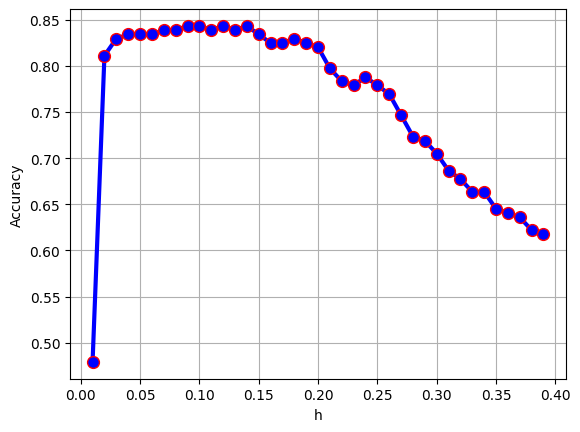

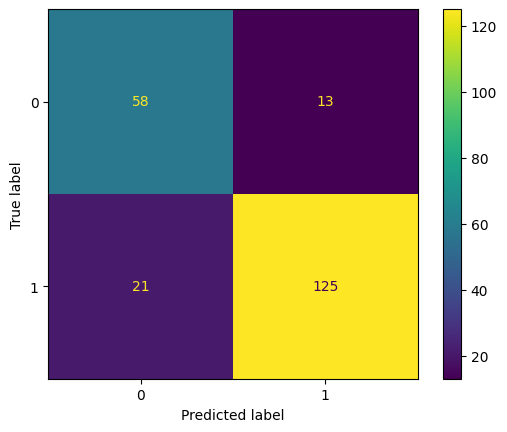

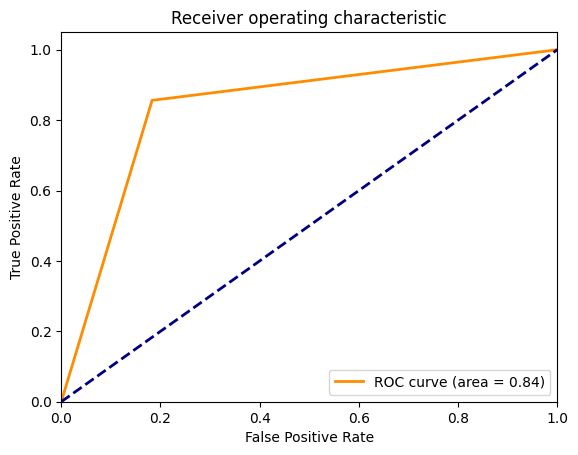

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.metrics import confusion_matrix

normal_data = pd.read_excel('/content/biodeg_normal.xlsx', engine='openpyxl').values

m, n = normal_data.shape
num_of_train = 837
num_of_test = m - num_of_train
data_train = normal_data[:num_of_train, :]
data_test = normal_data[num_of_train:, :]

p1 = np.zeros(num_of_test)
p2 = np.zeros(num_of_test)

class1_train = np.where(data_train[:, -1] == 1)[0]
class2_train = np.where(data_train[:, -1] == 2)[0]

class1_test = np.where(data_test[:, -1] == 1)[0]
class2_test = np.where(data_test[:, -1] == 2)[0]

N1 = len(class1_train)
N2 = len(class2_train)

N1_test = len(class1_test)
N2_test = len(class2_test)

data_class1_train = data_train[class1_train, :]
data_class2_train = data_train[class2_train, :]

d_t1 = np.zeros((num_of_test, 2))
d_t2 = np.zeros((num_of_test, 2))

h = np.arange(0.01, 0.4, 0.01)
acc = np.zeros(len(h))
MAR = np.zeros(len(h))
FAR = np.zeros(len(h))

for i in range(len(data_test)):
    if data_test[i, -1] == 1:
        d_t2[i, :] = [1, 0]
    elif data_test[i, -1] == 2:
        d_t2[i, :] = [0, 1]

for j in range(len(h)):
    for i in range(len(data_test)):
        p1[i] = parzen_gussian(data_class1_train, data_test[i, :-1], n - 1, h[j], N1)
        p2[i] = parzen_gussian(data_class2_train, data_test[i, :-1], n - 1, h[j], N2)

    for i in range(len(data_test)):
        if p1[i] > p2[i]:
            d_t1[i, :] = [1, 0]
        elif p2[i] > p1[i]:
            d_t1[i, :] = [0, 1]

    cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[1, 0]
    FN = cm[0, 1]

    acc[j] = (TP + TN) / (TP + TN + FP + FN)
    MAR[j] = TP / (TP + FN)
    FAR[j] = TN / (TN + FP)

h_acc = np.column_stack((h, acc))
best_acc = np.sort(acc)[-1]
best_h_pos = np.where(h_acc[:, 1] == best_acc)[0][0]
best_h = h_acc[best_h_pos, 0]

for i in range(len(data_test)):
    p1[i] = parzen_gussian(data_class1_train, data_test[i, :-1], n - 1, best_h, N1)
    p2[i] = parzen_gussian(data_class2_train, data_test[i, :-1], n - 1, best_h, N2)

for i in range(len(data_test)):
  h_acc = np.column_stack((h, acc))
  best_acc = np.sort(acc)[-1]

  best_h_pos = np.where(h_acc[:,1] == best_acc)[0][0]
  best_h = h_acc[best_h_pos,0]

for i in range(len(data_test)):
  p1[i] = parzen_gussian(data_class1_train, data_test[i,:n-1], n-1, best_h, N1)
  p2[i] = parzen_gussian(data_class2_train, data_test[i,:n-1], n-1, best_h, N2)

d_t1 = np.zeros((num_of_test, 2))
for i in range(len(data_test)):
  if p1[i] > p2[i]:
    d_t1[i,:] = [1, 0]
  if p2[i] > p1[i]:
    d_t1[i,:] = [0, 1]

plt.figure(1)
plt.plot(h, acc, '-bo', markeredgecolor='r', linewidth=3, markersize=8.5)
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Accuracy')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))

# Display confusion matrix
display = ConfusionMatrixDisplay(cm)
display.plot()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get ROC curve and AUC
fpr, tpr, thresholds = roc_curve(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
best_h

0.09

In [ ]:
best_acc

0.8433179723502304

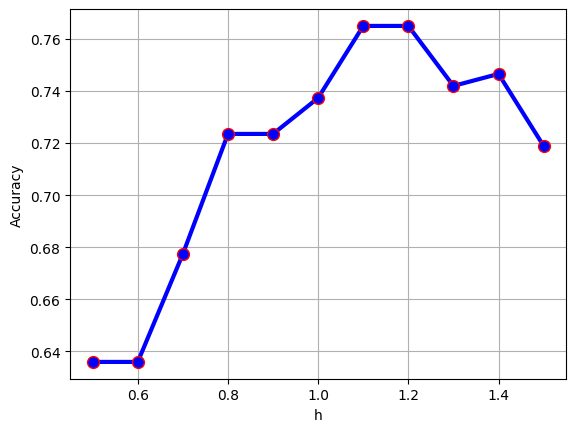

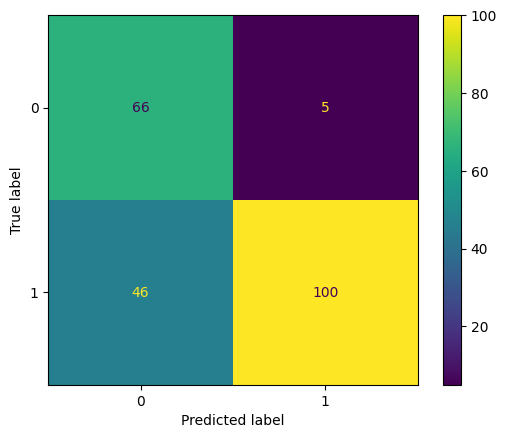

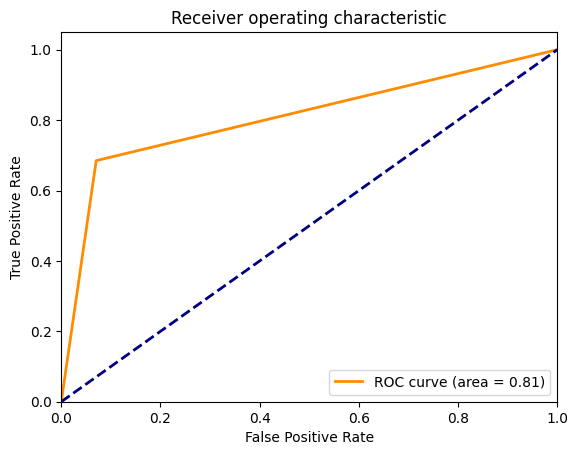

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.metrics import confusion_matrix

normal_data = pd.read_excel('/content/biodeg_normal.xlsx', engine='openpyxl').values

m, n = normal_data.shape
num_of_train = 837
num_of_test = m - num_of_train
data_train = normal_data[:num_of_train, :]
data_test = normal_data[num_of_train:, :]

p1 = np.zeros(num_of_test)
p2 = np.zeros(num_of_test)

class1_train = np.where(data_train[:, -1] == 1)[0]
class2_train = np.where(data_train[:, -1] == 2)[0]

class1_test = np.where(data_test[:, -1] == 1)[0]
class2_test = np.where(data_test[:, -1] == 2)[0]

N1 = len(class1_train)
N2 = len(class2_train)

N1_test = len(class1_test)
N2_test = len(class2_test)

data_class1_train = data_train[class1_train, :]
data_class2_train = data_train[class2_train, :]

d_t1 = np.zeros((num_of_test, 2))
d_t2 = np.zeros((num_of_test, 2))

h = np.arange(0.5, 1.6, 0.1)
acc = np.zeros(len(h))
MAR = np.zeros(len(h))
FAR = np.zeros(len(h))

for i in range(len(data_test)):
    if data_test[i, -1] == 1:
        d_t2[i, :] = [1, 0]
    elif data_test[i, -1] == 2:
        d_t2[i, :] = [0, 1]

for j in range(len(h)):
    for i in range(len(data_test)):
        p1[i] = parzen_Triangular(data_class1_train, data_test[i, :-1], n - 1, h[j], N1)
        p2[i] = parzen_Triangular(data_class2_train, data_test[i, :-1], n - 1, h[j], N2)

    for i in range(len(data_test)):
        if p1[i] > p2[i]:
            d_t1[i, :] = [1, 0]
        elif p2[i] > p1[i]:
            d_t1[i, :] = [0, 1]

    cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[1, 0]
    FN = cm[0, 1]

    acc[j] = (TP + TN) / (TP + TN + FP + FN)
    MAR[j] = TP / (TP + FN)
    FAR[j] = TN / (TN + FP)

h_acc = np.column_stack((h, acc))
best_acc = np.sort(acc)[-1]
best_h_pos = np.where(h_acc[:, 1] == best_acc)[0][0]
best_h = h_acc[best_h_pos, 0]

for i in range(len(data_test)):
    p1[i] = parzen_Triangular(data_class1_train, data_test[i, :-1], n - 1, best_h, N1)
    p2[i] = parzen_Triangular(data_class2_train, data_test[i, :-1], n - 1, best_h, N2)

for i in range(len(data_test)):
  h_acc = np.column_stack((h, acc))
  best_acc = np.sort(acc)[-1]

  best_h_pos = np.where(h_acc[:,1] == best_acc)[0][0]
  best_h = h_acc[best_h_pos,0]

for i in range(len(data_test)):
  p1[i] = parzen_Triangular(data_class1_train, data_test[i,:n-1], n-1, best_h, N1)
  p2[i] = parzen_Triangular(data_class2_train, data_test[i,:n-1], n-1, best_h, N2)

d_t1 = np.zeros((num_of_test, 2))
for i in range(len(data_test)):
  if p1[i] > p2[i]:
    d_t1[i,:] = [1, 0]
  if p2[i] > p1[i]:
    d_t1[i,:] = [0, 1]

plt.figure(1)
plt.plot(h, acc, '-bo', markeredgecolor='r', linewidth=3, markersize=8.5)
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Accuracy')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))

# Display confusion matrix
display = ConfusionMatrixDisplay(cm)
display.plot()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get ROC curve and AUC
fpr, tpr, thresholds = roc_curve(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## [KNN](https://vc4012.kntu.ac.ir/mod/page/view.php?id=8730)

In [ ]:
import numpy as np

def k_nn(data_class_train, data_test, kn, N, dim):
    m, n = data_class_train.shape
    dis = np.zeros((m,1))
    
    for i in range(m):
        dis[i,0] = np.linalg.norm(data_class_train[i,:n-1] - data_test[0,:n-1])
    
    dis = np.sort(dis, axis=0)

    p = kn / ((dis[kn-1, 0]**dim)*N)
    
    return p

## Parzen

### Gaussian

In [ ]:
import numpy as np

def parzen_gussian(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    
    for j in range(row):
        dis = np.linalg.norm(data_class_train[j, :col-1] - data_test)
        dis = (1 / (np.sqrt(2 * np.pi) * h) ** dim) * np.exp(-dis / (2 * h ** 2))
        Sum += dis
    
    p = Sum / N
    
    return p

### Square, hyper-cube, ...

In [ ]:
import numpy as np

def parzen_Square(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    dis = np.zeros((row, 1))
    
    for j in range(row):
        dis[j] = np.linalg.norm(data_class_train[j, :col-1] - data_test[0, :]) / h
        
        if dis[j] <= 1/2:
            Sum += 1
    
    p = np.log(Sum / (N * h ** dim))
    
    return p

In [ ]:
import numpy as np

def parzen_square_pdf(x, w, h):
    """
    Calculate the probability density function using the Parzen window estimator with a square kernel.
    
    Parameters:
    x (numpy array): a row vector of the test data
    w (numpy array): a matrix of the training data, where each row is a data point
    h (float): the width of the square kernel
    
    Returns:
    y (float): the estimated probability density at x
    q (float): the sum of the kernel values for each training data point
    """
    
    N, l = w.shape
    
    q = 0
    for i in range(N):
        q += square_kernel((w[i,:] - x) / h, l)
        
    y = q / (h**l * N)
    
    return y, q

def square_kernel(x, l):
    """
    Calculate the value of the square kernel.
    
    Parameters:
    x (numpy array): a row vector
    l (int): the length of the row vector
    
    Returns:
    y (float): the value of the square kernel at x
    """
    
    y = np.sum(np.abs(x) <= 0.5) / l
    
    return y

In [ ]:
def square_kernel(x, l):
    return np.sum(np.abs(x) <= 0.5) / l
    
def parzen_square_pdf(data_test, data_class_train, h):
    N, l = data_class_train.shape
    q = 0
    for i in range(N):
        q += square_kernel((data_class_train[i, :]-data_test) / h, l)
    y = q / (h**l * N)
    return y, q

In [ ]:
def parzen_Square(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    q = 0
    for i in range(row):
        q += square_kernel((data_class_train[i, :col-1] - data_test) / h, col-1)
    y = q / (h**(col-1) * N)
    p = np.log(y / N)
    return p
       
def square_kernel(x, l):
    return np.sum(np.abs(x) <= 0.5) / l

In [ ]:
# % MATLAB Parzen Pdf Estimation (Square)

# function [y,q] = parzen_square_pdf(x,w,h)         % pdf function  %w= class name_tr 
#    [N,l]=size(w);                      % N = number of train data      m = number of sensor
   
#    q=0; 
#     for i=1:N
#         q = q + square_kernel( (w(i,:)-x) ./ h ,l) ;
#     end
#     y = q / (h^l * N) ; 
   
# end

# function [y]= square_kernel (x,l)
#    y=sum(abs(x) <= 0.5) /l;
# end

In [ ]:
# % MATLAB Parzen Pdf Estimation (Square)
# function [y,q] = parzen_square_pdf(x,w,h)       
#    [N,l]=size(w);                      
   
#    q=0; 
#     for i=1:N
#         q = q + square_kernel( (w(i,:)-x) ./ h ) ;
#     end
#     y = q / (h^l * N) ; 
   
# end

# function [y]= square_kernel (x)
#   if prod(abs(x) <= 0.5)== 1
#      y=1;
#   else
#      y=0;
#   end
# end

### Triangular

In [ ]:
import numpy as np

def parzen_Triangular(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    
    L = len(data_test)
    
    for j in range(row):
        if np.linalg.norm(data_class_train[j, :col-1] - data_test) <= h/2:
            dis = ((h/2) - np.linalg.norm(data_class_train[j, :col-1] - data_test)) / (h/2)
            Sum += dis
    
    p = Sum / (N * h ** dim)
    
    return p


### Main

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1yfv4IX2yNfp-hAy2LqeP_YnGAJ2ItYCR


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1yfv4IX2yNfp-hAy2LqeP_YnGAJ2ItYCR
To: /content/biodeg_normal.xlsx
100% 351k/351k [00:00<00:00, 121MB/s]


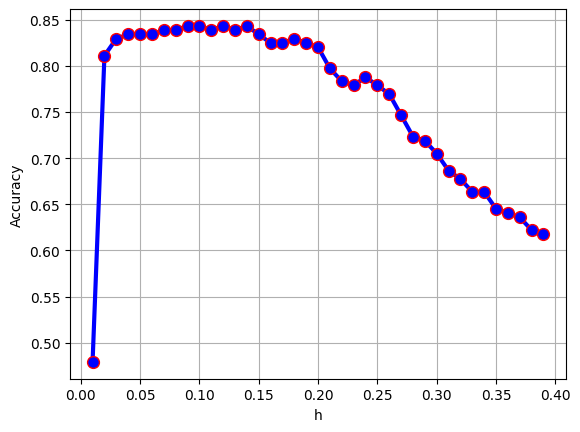

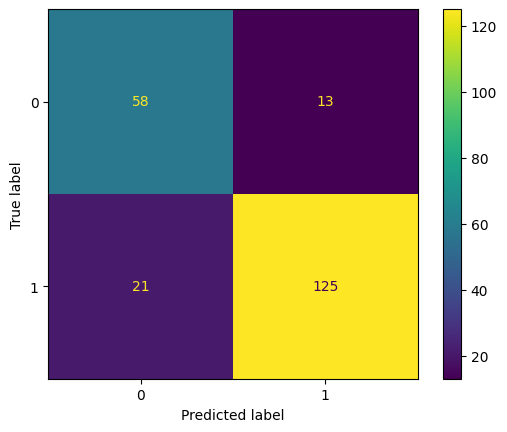

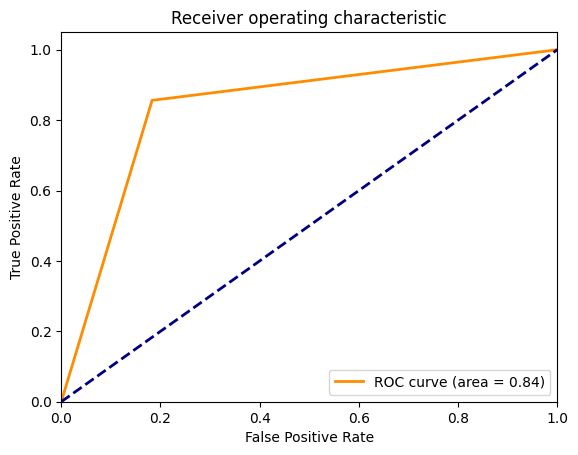

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.metrics import confusion_matrix

normal_data = pd.read_excel('/content/biodeg_normal.xlsx', engine='openpyxl').values

m, n = normal_data.shape
num_of_train = 837
num_of_test = m - num_of_train
data_train = normal_data[:num_of_train, :]
data_test = normal_data[num_of_train:, :]

p1 = np.zeros(num_of_test)
p2 = np.zeros(num_of_test)

class1_train = np.where(data_train[:, -1] == 1)[0]
class2_train = np.where(data_train[:, -1] == 2)[0]

class1_test = np.where(data_test[:, -1] == 1)[0]
class2_test = np.where(data_test[:, -1] == 2)[0]

N1 = len(class1_train)
N2 = len(class2_train)

N1_test = len(class1_test)
N2_test = len(class2_test)

data_class1_train = data_train[class1_train, :]
data_class2_train = data_train[class2_train, :]

d_t1 = np.zeros((num_of_test, 2))
d_t2 = np.zeros((num_of_test, 2))

h = np.arange(0.01, 0.4, 0.01)
acc = np.zeros(len(h))
MAR = np.zeros(len(h))
FAR = np.zeros(len(h))

for i in range(len(data_test)):
    if data_test[i, -1] == 1:
        d_t2[i, :] = [1, 0]
    elif data_test[i, -1] == 2:
        d_t2[i, :] = [0, 1]

for j in range(len(h)):
    for i in range(len(data_test)):
        p1[i] = parzen_gussian(data_class1_train, data_test[i, :-1], n - 1, h[j], N1)
        p2[i] = parzen_gussian(data_class2_train, data_test[i, :-1], n - 1, h[j], N2)

    for i in range(len(data_test)):
        if p1[i] > p2[i]:
            d_t1[i, :] = [1, 0]
        elif p2[i] > p1[i]:
            d_t1[i, :] = [0, 1]

    cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[1, 0]
    FN = cm[0, 1]

    acc[j] = (TP + TN) / (TP + TN + FP + FN)
    MAR[j] = TP / (TP + FN)
    FAR[j] = TN / (TN + FP)

h_acc = np.column_stack((h, acc))
best_acc = np.sort(acc)[-1]
best_h_pos = np.where(h_acc[:, 1] == best_acc)[0][0]
best_h = h_acc[best_h_pos, 0]

for i in range(len(data_test)):
    p1[i] = parzen_gussian(data_class1_train, data_test[i, :-1], n - 1, best_h, N1)
    p2[i] = parzen_gussian(data_class2_train, data_test[i, :-1], n - 1, best_h, N2)

for i in range(len(data_test)):
  h_acc = np.column_stack((h, acc))
  best_acc = np.sort(acc)[-1]

  best_h_pos = np.where(h_acc[:,1] == best_acc)[0][0]
  best_h = h_acc[best_h_pos,0]

for i in range(len(data_test)):
  p1[i] = parzen_gussian(data_class1_train, data_test[i,:n-1], n-1, best_h, N1)
  p2[i] = parzen_gussian(data_class2_train, data_test[i,:n-1], n-1, best_h, N2)

d_t1 = np.zeros((num_of_test, 2))
for i in range(len(data_test)):
  if p1[i] > p2[i]:
    d_t1[i,:] = [1, 0]
  if p2[i] > p1[i]:
    d_t1[i,:] = [0, 1]

plt.figure(1)
plt.plot(h, acc, '-bo', markeredgecolor='r', linewidth=3, markersize=8.5)
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Accuracy')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))

# Display confusion matrix
display = ConfusionMatrixDisplay(cm)
display.plot()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get ROC curve and AUC
fpr, tpr, thresholds = roc_curve(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
best_h

0.09

In [ ]:
best_acc

0.8433179723502304

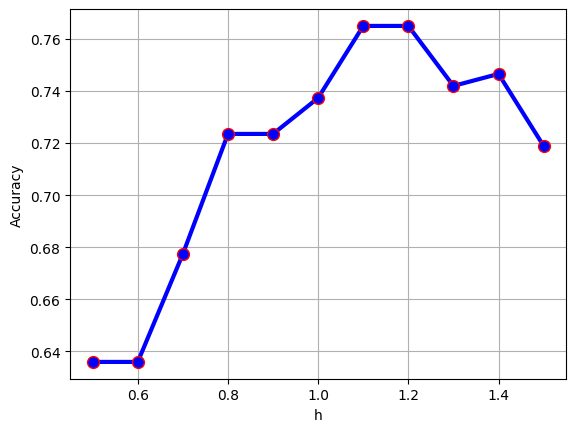

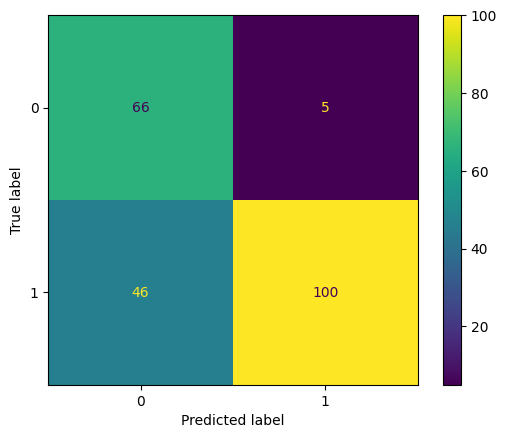

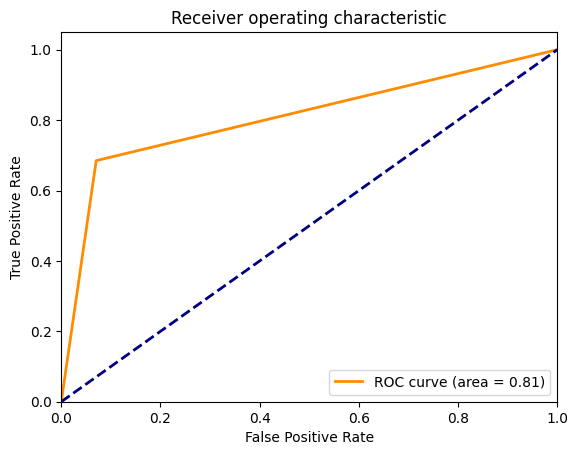

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.metrics import confusion_matrix

normal_data = pd.read_excel('/content/biodeg_normal.xlsx', engine='openpyxl').values

m, n = normal_data.shape
num_of_train = 837
num_of_test = m - num_of_train
data_train = normal_data[:num_of_train, :]
data_test = normal_data[num_of_train:, :]

p1 = np.zeros(num_of_test)
p2 = np.zeros(num_of_test)

class1_train = np.where(data_train[:, -1] == 1)[0]
class2_train = np.where(data_train[:, -1] == 2)[0]

class1_test = np.where(data_test[:, -1] == 1)[0]
class2_test = np.where(data_test[:, -1] == 2)[0]

N1 = len(class1_train)
N2 = len(class2_train)

N1_test = len(class1_test)
N2_test = len(class2_test)

data_class1_train = data_train[class1_train, :]
data_class2_train = data_train[class2_train, :]

d_t1 = np.zeros((num_of_test, 2))
d_t2 = np.zeros((num_of_test, 2))

h = np.arange(0.5, 1.6, 0.1)
acc = np.zeros(len(h))
MAR = np.zeros(len(h))
FAR = np.zeros(len(h))

for i in range(len(data_test)):
    if data_test[i, -1] == 1:
        d_t2[i, :] = [1, 0]
    elif data_test[i, -1] == 2:
        d_t2[i, :] = [0, 1]

for j in range(len(h)):
    for i in range(len(data_test)):
        p1[i] = parzen_Triangular(data_class1_train, data_test[i, :-1], n - 1, h[j], N1)
        p2[i] = parzen_Triangular(data_class2_train, data_test[i, :-1], n - 1, h[j], N2)

    for i in range(len(data_test)):
        if p1[i] > p2[i]:
            d_t1[i, :] = [1, 0]
        elif p2[i] > p1[i]:
            d_t1[i, :] = [0, 1]

    cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[1, 0]
    FN = cm[0, 1]

    acc[j] = (TP + TN) / (TP + TN + FP + FN)
    MAR[j] = TP / (TP + FN)
    FAR[j] = TN / (TN + FP)

h_acc = np.column_stack((h, acc))
best_acc = np.sort(acc)[-1]
best_h_pos = np.where(h_acc[:, 1] == best_acc)[0][0]
best_h = h_acc[best_h_pos, 0]

for i in range(len(data_test)):
    p1[i] = parzen_Triangular(data_class1_train, data_test[i, :-1], n - 1, best_h, N1)
    p2[i] = parzen_Triangular(data_class2_train, data_test[i, :-1], n - 1, best_h, N2)

for i in range(len(data_test)):
  h_acc = np.column_stack((h, acc))
  best_acc = np.sort(acc)[-1]

  best_h_pos = np.where(h_acc[:,1] == best_acc)[0][0]
  best_h = h_acc[best_h_pos,0]

for i in range(len(data_test)):
  p1[i] = parzen_Triangular(data_class1_train, data_test[i,:n-1], n-1, best_h, N1)
  p2[i] = parzen_Triangular(data_class2_train, data_test[i,:n-1], n-1, best_h, N2)

d_t1 = np.zeros((num_of_test, 2))
for i in range(len(data_test)):
  if p1[i] > p2[i]:
    d_t1[i,:] = [1, 0]
  if p2[i] > p1[i]:
    d_t1[i,:] = [0, 1]

plt.figure(1)
plt.plot(h, acc, '-bo', markeredgecolor='r', linewidth=3, markersize=8.5)
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Accuracy')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))

# Display confusion matrix
display = ConfusionMatrixDisplay(cm)
display.plot()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get ROC curve and AUC
fpr, tpr, thresholds = roc_curve(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## [KNN](https://vc4012.kntu.ac.ir/mod/page/view.php?id=8730)

In [ ]:
import numpy as np

def k_nn(data_class_train, data_test, kn, N, dim):
    m, n = data_class_train.shape
    dis = np.zeros((m,1))
    
    for i in range(m):
        dis[i,0] = np.linalg.norm(data_class_train[i,:n-1] - data_test[0,:n-1])
    
    dis = np.sort(dis, axis=0)

    p = kn / ((dis[kn-1, 0]**dim)*N)
    
    return p

## Parzen

### Gaussian

In [ ]:
import numpy as np

def parzen_gussian(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    
    for j in range(row):
        dis = np.linalg.norm(data_class_train[j, :col-1] - data_test)
        dis = (1 / (np.sqrt(2 * np.pi) * h) ** dim) * np.exp(-dis / (2 * h ** 2))
        Sum += dis
    
    p = Sum / N
    
    return p

### Square, hyper-cube, ...

In [ ]:
import numpy as np

def parzen_Square(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    dis = np.zeros((row, 1))
    
    for j in range(row):
        dis[j] = np.linalg.norm(data_class_train[j, :col-1] - data_test[0, :]) / h
        
        if dis[j] <= 1/2:
            Sum += 1
    
    p = np.log(Sum / (N * h ** dim))
    
    return p

In [ ]:
import numpy as np

def parzen_square_pdf(x, w, h):
    """
    Calculate the probability density function using the Parzen window estimator with a square kernel.
    
    Parameters:
    x (numpy array): a row vector of the test data
    w (numpy array): a matrix of the training data, where each row is a data point
    h (float): the width of the square kernel
    
    Returns:
    y (float): the estimated probability density at x
    q (float): the sum of the kernel values for each training data point
    """
    
    N, l = w.shape
    
    q = 0
    for i in range(N):
        q += square_kernel((w[i,:] - x) / h, l)
        
    y = q / (h**l * N)
    
    return y, q

def square_kernel(x, l):
    """
    Calculate the value of the square kernel.
    
    Parameters:
    x (numpy array): a row vector
    l (int): the length of the row vector
    
    Returns:
    y (float): the value of the square kernel at x
    """
    
    y = np.sum(np.abs(x) <= 0.5) / l
    
    return y

In [ ]:
def square_kernel(x, l):
    return np.sum(np.abs(x) <= 0.5) / l
    
def parzen_square_pdf(data_test, data_class_train, h):
    N, l = data_class_train.shape
    q = 0
    for i in range(N):
        q += square_kernel((data_class_train[i, :]-data_test) / h, l)
    y = q / (h**l * N)
    return y, q

In [ ]:
def parzen_Square(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    q = 0
    for i in range(row):
        q += square_kernel((data_class_train[i, :col-1] - data_test) / h, col-1)
    y = q / (h**(col-1) * N)
    p = np.log(y / N)
    return p
       
def square_kernel(x, l):
    return np.sum(np.abs(x) <= 0.5) / l

In [ ]:
# % MATLAB Parzen Pdf Estimation (Square)

# function [y,q] = parzen_square_pdf(x,w,h)         % pdf function  %w= class name_tr 
#    [N,l]=size(w);                      % N = number of train data      m = number of sensor
   
#    q=0; 
#     for i=1:N
#         q = q + square_kernel( (w(i,:)-x) ./ h ,l) ;
#     end
#     y = q / (h^l * N) ; 
   
# end

# function [y]= square_kernel (x,l)
#    y=sum(abs(x) <= 0.5) /l;
# end

In [ ]:
# % MATLAB Parzen Pdf Estimation (Square)
# function [y,q] = parzen_square_pdf(x,w,h)       
#    [N,l]=size(w);                      
   
#    q=0; 
#     for i=1:N
#         q = q + square_kernel( (w(i,:)-x) ./ h ) ;
#     end
#     y = q / (h^l * N) ; 
   
# end

# function [y]= square_kernel (x)
#   if prod(abs(x) <= 0.5)== 1
#      y=1;
#   else
#      y=0;
#   end
# end

### Triangular

In [ ]:
import numpy as np

def parzen_Triangular(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    
    L = len(data_test)
    
    for j in range(row):
        if np.linalg.norm(data_class_train[j, :col-1] - data_test) <= h/2:
            dis = ((h/2) - np.linalg.norm(data_class_train[j, :col-1] - data_test)) / (h/2)
            Sum += dis
    
    p = Sum / (N * h ** dim)
    
    return p


### Main

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1yfv4IX2yNfp-hAy2LqeP_YnGAJ2ItYCR


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1yfv4IX2yNfp-hAy2LqeP_YnGAJ2ItYCR
To: /content/biodeg_normal.xlsx
100% 351k/351k [00:00<00:00, 121MB/s]


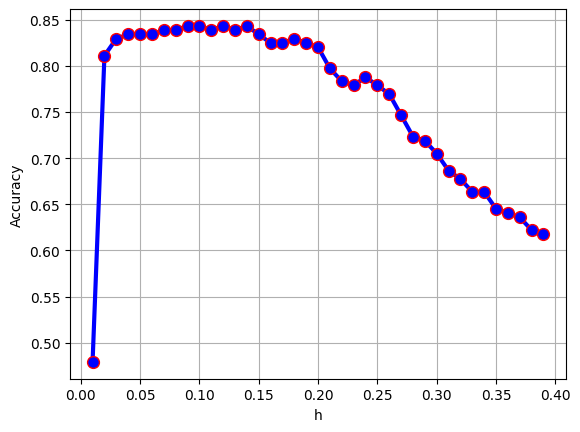

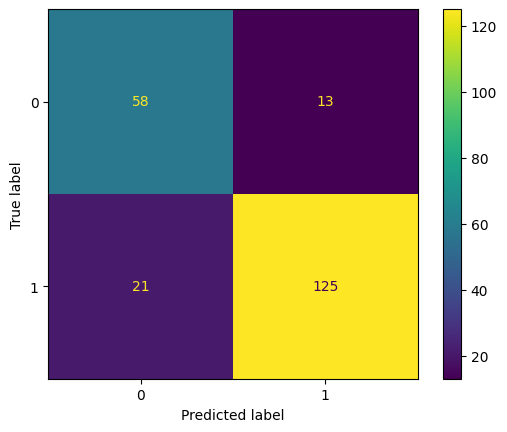

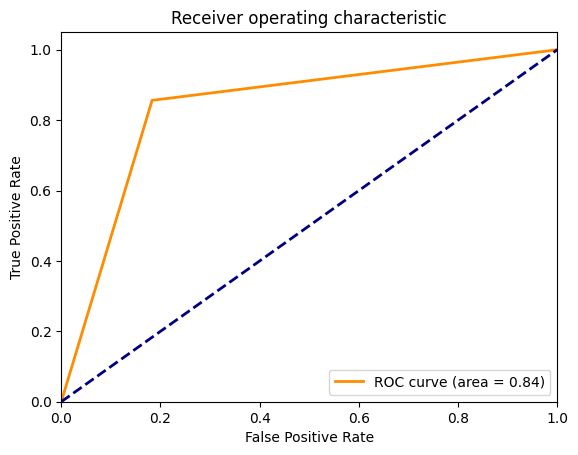

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.metrics import confusion_matrix

normal_data = pd.read_excel('/content/biodeg_normal.xlsx', engine='openpyxl').values

m, n = normal_data.shape
num_of_train = 837
num_of_test = m - num_of_train
data_train = normal_data[:num_of_train, :]
data_test = normal_data[num_of_train:, :]

p1 = np.zeros(num_of_test)
p2 = np.zeros(num_of_test)

class1_train = np.where(data_train[:, -1] == 1)[0]
class2_train = np.where(data_train[:, -1] == 2)[0]

class1_test = np.where(data_test[:, -1] == 1)[0]
class2_test = np.where(data_test[:, -1] == 2)[0]

N1 = len(class1_train)
N2 = len(class2_train)

N1_test = len(class1_test)
N2_test = len(class2_test)

data_class1_train = data_train[class1_train, :]
data_class2_train = data_train[class2_train, :]

d_t1 = np.zeros((num_of_test, 2))
d_t2 = np.zeros((num_of_test, 2))

h = np.arange(0.01, 0.4, 0.01)
acc = np.zeros(len(h))
MAR = np.zeros(len(h))
FAR = np.zeros(len(h))

for i in range(len(data_test)):
    if data_test[i, -1] == 1:
        d_t2[i, :] = [1, 0]
    elif data_test[i, -1] == 2:
        d_t2[i, :] = [0, 1]

for j in range(len(h)):
    for i in range(len(data_test)):
        p1[i] = parzen_gussian(data_class1_train, data_test[i, :-1], n - 1, h[j], N1)
        p2[i] = parzen_gussian(data_class2_train, data_test[i, :-1], n - 1, h[j], N2)

    for i in range(len(data_test)):
        if p1[i] > p2[i]:
            d_t1[i, :] = [1, 0]
        elif p2[i] > p1[i]:
            d_t1[i, :] = [0, 1]

    cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[1, 0]
    FN = cm[0, 1]

    acc[j] = (TP + TN) / (TP + TN + FP + FN)
    MAR[j] = TP / (TP + FN)
    FAR[j] = TN / (TN + FP)

h_acc = np.column_stack((h, acc))
best_acc = np.sort(acc)[-1]
best_h_pos = np.where(h_acc[:, 1] == best_acc)[0][0]
best_h = h_acc[best_h_pos, 0]

for i in range(len(data_test)):
    p1[i] = parzen_gussian(data_class1_train, data_test[i, :-1], n - 1, best_h, N1)
    p2[i] = parzen_gussian(data_class2_train, data_test[i, :-1], n - 1, best_h, N2)

for i in range(len(data_test)):
  h_acc = np.column_stack((h, acc))
  best_acc = np.sort(acc)[-1]

  best_h_pos = np.where(h_acc[:,1] == best_acc)[0][0]
  best_h = h_acc[best_h_pos,0]

for i in range(len(data_test)):
  p1[i] = parzen_gussian(data_class1_train, data_test[i,:n-1], n-1, best_h, N1)
  p2[i] = parzen_gussian(data_class2_train, data_test[i,:n-1], n-1, best_h, N2)

d_t1 = np.zeros((num_of_test, 2))
for i in range(len(data_test)):
  if p1[i] > p2[i]:
    d_t1[i,:] = [1, 0]
  if p2[i] > p1[i]:
    d_t1[i,:] = [0, 1]

plt.figure(1)
plt.plot(h, acc, '-bo', markeredgecolor='r', linewidth=3, markersize=8.5)
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Accuracy')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))

# Display confusion matrix
display = ConfusionMatrixDisplay(cm)
display.plot()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get ROC curve and AUC
fpr, tpr, thresholds = roc_curve(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
best_h

0.09

In [ ]:
best_acc

0.8433179723502304

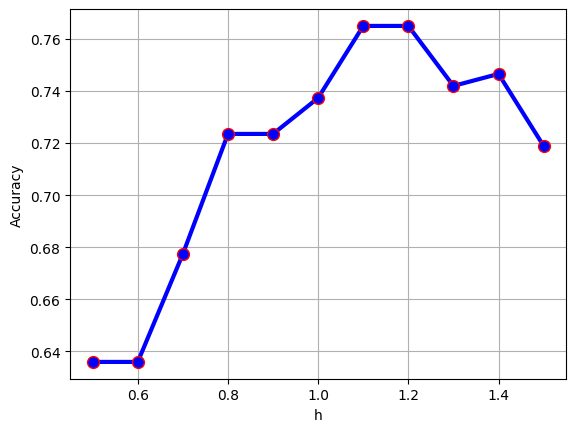

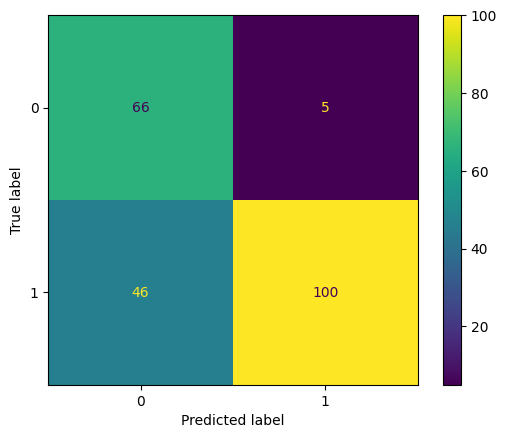

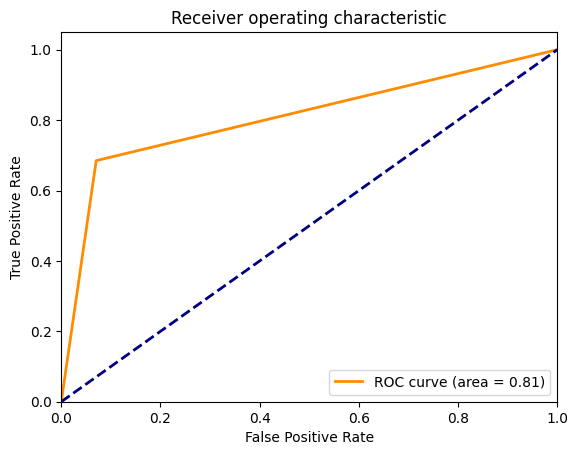

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.metrics import confusion_matrix

normal_data = pd.read_excel('/content/biodeg_normal.xlsx', engine='openpyxl').values

m, n = normal_data.shape
num_of_train = 837
num_of_test = m - num_of_train
data_train = normal_data[:num_of_train, :]
data_test = normal_data[num_of_train:, :]

p1 = np.zeros(num_of_test)
p2 = np.zeros(num_of_test)

class1_train = np.where(data_train[:, -1] == 1)[0]
class2_train = np.where(data_train[:, -1] == 2)[0]

class1_test = np.where(data_test[:, -1] == 1)[0]
class2_test = np.where(data_test[:, -1] == 2)[0]

N1 = len(class1_train)
N2 = len(class2_train)

N1_test = len(class1_test)
N2_test = len(class2_test)

data_class1_train = data_train[class1_train, :]
data_class2_train = data_train[class2_train, :]

d_t1 = np.zeros((num_of_test, 2))
d_t2 = np.zeros((num_of_test, 2))

h = np.arange(0.5, 1.6, 0.1)
acc = np.zeros(len(h))
MAR = np.zeros(len(h))
FAR = np.zeros(len(h))

for i in range(len(data_test)):
    if data_test[i, -1] == 1:
        d_t2[i, :] = [1, 0]
    elif data_test[i, -1] == 2:
        d_t2[i, :] = [0, 1]

for j in range(len(h)):
    for i in range(len(data_test)):
        p1[i] = parzen_Triangular(data_class1_train, data_test[i, :-1], n - 1, h[j], N1)
        p2[i] = parzen_Triangular(data_class2_train, data_test[i, :-1], n - 1, h[j], N2)

    for i in range(len(data_test)):
        if p1[i] > p2[i]:
            d_t1[i, :] = [1, 0]
        elif p2[i] > p1[i]:
            d_t1[i, :] = [0, 1]

    cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[1, 0]
    FN = cm[0, 1]

    acc[j] = (TP + TN) / (TP + TN + FP + FN)
    MAR[j] = TP / (TP + FN)
    FAR[j] = TN / (TN + FP)

h_acc = np.column_stack((h, acc))
best_acc = np.sort(acc)[-1]
best_h_pos = np.where(h_acc[:, 1] == best_acc)[0][0]
best_h = h_acc[best_h_pos, 0]

for i in range(len(data_test)):
    p1[i] = parzen_Triangular(data_class1_train, data_test[i, :-1], n - 1, best_h, N1)
    p2[i] = parzen_Triangular(data_class2_train, data_test[i, :-1], n - 1, best_h, N2)

for i in range(len(data_test)):
  h_acc = np.column_stack((h, acc))
  best_acc = np.sort(acc)[-1]

  best_h_pos = np.where(h_acc[:,1] == best_acc)[0][0]
  best_h = h_acc[best_h_pos,0]

for i in range(len(data_test)):
  p1[i] = parzen_Triangular(data_class1_train, data_test[i,:n-1], n-1, best_h, N1)
  p2[i] = parzen_Triangular(data_class2_train, data_test[i,:n-1], n-1, best_h, N2)

d_t1 = np.zeros((num_of_test, 2))
for i in range(len(data_test)):
  if p1[i] > p2[i]:
    d_t1[i,:] = [1, 0]
  if p2[i] > p1[i]:
    d_t1[i,:] = [0, 1]

plt.figure(1)
plt.plot(h, acc, '-bo', markeredgecolor='r', linewidth=3, markersize=8.5)
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Accuracy')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))

# Display confusion matrix
display = ConfusionMatrixDisplay(cm)
display.plot()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get ROC curve and AUC
fpr, tpr, thresholds = roc_curve(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## [KNN](https://vc4012.kntu.ac.ir/mod/page/view.php?id=8730)

In [ ]:
import numpy as np

def k_nn(data_class_train, data_test, kn, N, dim):
    m, n = data_class_train.shape
    dis = np.zeros((m,1))
    
    for i in range(m):
        dis[i,0] = np.linalg.norm(data_class_train[i,:n-1] - data_test[0,:n-1])
    
    dis = np.sort(dis, axis=0)

    p = kn / ((dis[kn-1, 0]**dim)*N)
    
    return p

## Parzen

### Gaussian

In [ ]:
import numpy as np

def parzen_gussian(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    
    for j in range(row):
        dis = np.linalg.norm(data_class_train[j, :col-1] - data_test)
        dis = (1 / (np.sqrt(2 * np.pi) * h) ** dim) * np.exp(-dis / (2 * h ** 2))
        Sum += dis
    
    p = Sum / N
    
    return p

### Square, hyper-cube, ...

In [ ]:
import numpy as np

def parzen_Square(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    dis = np.zeros((row, 1))
    
    for j in range(row):
        dis[j] = np.linalg.norm(data_class_train[j, :col-1] - data_test[0, :]) / h
        
        if dis[j] <= 1/2:
            Sum += 1
    
    p = np.log(Sum / (N * h ** dim))
    
    return p

In [ ]:
import numpy as np

def parzen_square_pdf(x, w, h):
    """
    Calculate the probability density function using the Parzen window estimator with a square kernel.
    
    Parameters:
    x (numpy array): a row vector of the test data
    w (numpy array): a matrix of the training data, where each row is a data point
    h (float): the width of the square kernel
    
    Returns:
    y (float): the estimated probability density at x
    q (float): the sum of the kernel values for each training data point
    """
    
    N, l = w.shape
    
    q = 0
    for i in range(N):
        q += square_kernel((w[i,:] - x) / h, l)
        
    y = q / (h**l * N)
    
    return y, q

def square_kernel(x, l):
    """
    Calculate the value of the square kernel.
    
    Parameters:
    x (numpy array): a row vector
    l (int): the length of the row vector
    
    Returns:
    y (float): the value of the square kernel at x
    """
    
    y = np.sum(np.abs(x) <= 0.5) / l
    
    return y

In [ ]:
def square_kernel(x, l):
    return np.sum(np.abs(x) <= 0.5) / l
    
def parzen_square_pdf(data_test, data_class_train, h):
    N, l = data_class_train.shape
    q = 0
    for i in range(N):
        q += square_kernel((data_class_train[i, :]-data_test) / h, l)
    y = q / (h**l * N)
    return y, q

In [ ]:
def parzen_Square(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    q = 0
    for i in range(row):
        q += square_kernel((data_class_train[i, :col-1] - data_test) / h, col-1)
    y = q / (h**(col-1) * N)
    p = np.log(y / N)
    return p
       
def square_kernel(x, l):
    return np.sum(np.abs(x) <= 0.5) / l

In [ ]:
# % MATLAB Parzen Pdf Estimation (Square)

# function [y,q] = parzen_square_pdf(x,w,h)         % pdf function  %w= class name_tr 
#    [N,l]=size(w);                      % N = number of train data      m = number of sensor
   
#    q=0; 
#     for i=1:N
#         q = q + square_kernel( (w(i,:)-x) ./ h ,l) ;
#     end
#     y = q / (h^l * N) ; 
   
# end

# function [y]= square_kernel (x,l)
#    y=sum(abs(x) <= 0.5) /l;
# end

In [ ]:
# % MATLAB Parzen Pdf Estimation (Square)
# function [y,q] = parzen_square_pdf(x,w,h)       
#    [N,l]=size(w);                      
   
#    q=0; 
#     for i=1:N
#         q = q + square_kernel( (w(i,:)-x) ./ h ) ;
#     end
#     y = q / (h^l * N) ; 
   
# end

# function [y]= square_kernel (x)
#   if prod(abs(x) <= 0.5)== 1
#      y=1;
#   else
#      y=0;
#   end
# end

### Triangular

In [ ]:
import numpy as np

def parzen_Triangular(data_class_train, data_test, dim, h, N):
    row, col = data_class_train.shape
    Sum = 0
    
    L = len(data_test)
    
    for j in range(row):
        if np.linalg.norm(data_class_train[j, :col-1] - data_test) <= h/2:
            dis = ((h/2) - np.linalg.norm(data_class_train[j, :col-1] - data_test)) / (h/2)
            Sum += dis
    
    p = Sum / (N * h ** dim)
    
    return p


### Main

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1yfv4IX2yNfp-hAy2LqeP_YnGAJ2ItYCR


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1yfv4IX2yNfp-hAy2LqeP_YnGAJ2ItYCR
To: /content/biodeg_normal.xlsx
100% 351k/351k [00:00<00:00, 121MB/s]


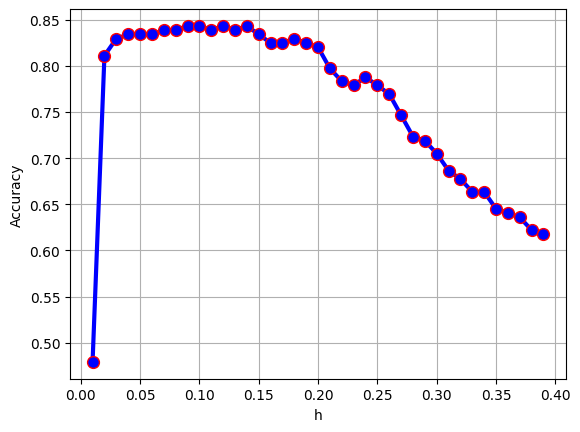

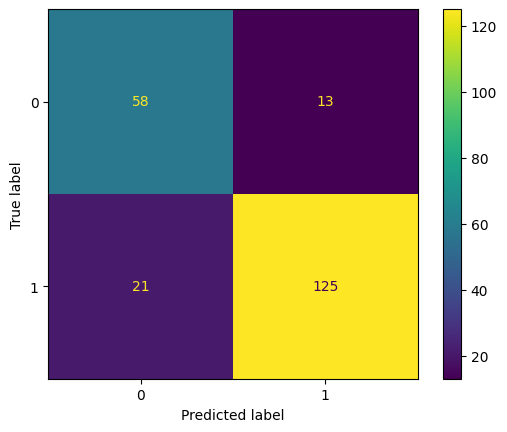

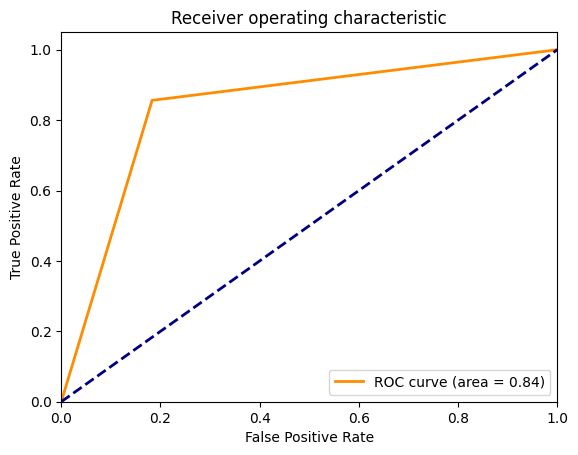

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.metrics import confusion_matrix

normal_data = pd.read_excel('/content/biodeg_normal.xlsx', engine='openpyxl').values

m, n = normal_data.shape
num_of_train = 837
num_of_test = m - num_of_train
data_train = normal_data[:num_of_train, :]
data_test = normal_data[num_of_train:, :]

p1 = np.zeros(num_of_test)
p2 = np.zeros(num_of_test)

class1_train = np.where(data_train[:, -1] == 1)[0]
class2_train = np.where(data_train[:, -1] == 2)[0]

class1_test = np.where(data_test[:, -1] == 1)[0]
class2_test = np.where(data_test[:, -1] == 2)[0]

N1 = len(class1_train)
N2 = len(class2_train)

N1_test = len(class1_test)
N2_test = len(class2_test)

data_class1_train = data_train[class1_train, :]
data_class2_train = data_train[class2_train, :]

d_t1 = np.zeros((num_of_test, 2))
d_t2 = np.zeros((num_of_test, 2))

h = np.arange(0.01, 0.4, 0.01)
acc = np.zeros(len(h))
MAR = np.zeros(len(h))
FAR = np.zeros(len(h))

for i in range(len(data_test)):
    if data_test[i, -1] == 1:
        d_t2[i, :] = [1, 0]
    elif data_test[i, -1] == 2:
        d_t2[i, :] = [0, 1]

for j in range(len(h)):
    for i in range(len(data_test)):
        p1[i] = parzen_gussian(data_class1_train, data_test[i, :-1], n - 1, h[j], N1)
        p2[i] = parzen_gussian(data_class2_train, data_test[i, :-1], n - 1, h[j], N2)

    for i in range(len(data_test)):
        if p1[i] > p2[i]:
            d_t1[i, :] = [1, 0]
        elif p2[i] > p1[i]:
            d_t1[i, :] = [0, 1]

    cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[1, 0]
    FN = cm[0, 1]

    acc[j] = (TP + TN) / (TP + TN + FP + FN)
    MAR[j] = TP / (TP + FN)
    FAR[j] = TN / (TN + FP)

h_acc = np.column_stack((h, acc))
best_acc = np.sort(acc)[-1]
best_h_pos = np.where(h_acc[:, 1] == best_acc)[0][0]
best_h = h_acc[best_h_pos, 0]

for i in range(len(data_test)):
    p1[i] = parzen_gussian(data_class1_train, data_test[i, :-1], n - 1, best_h, N1)
    p2[i] = parzen_gussian(data_class2_train, data_test[i, :-1], n - 1, best_h, N2)

for i in range(len(data_test)):
  h_acc = np.column_stack((h, acc))
  best_acc = np.sort(acc)[-1]

  best_h_pos = np.where(h_acc[:,1] == best_acc)[0][0]
  best_h = h_acc[best_h_pos,0]

for i in range(len(data_test)):
  p1[i] = parzen_gussian(data_class1_train, data_test[i,:n-1], n-1, best_h, N1)
  p2[i] = parzen_gussian(data_class2_train, data_test[i,:n-1], n-1, best_h, N2)

d_t1 = np.zeros((num_of_test, 2))
for i in range(len(data_test)):
  if p1[i] > p2[i]:
    d_t1[i,:] = [1, 0]
  if p2[i] > p1[i]:
    d_t1[i,:] = [0, 1]

plt.figure(1)
plt.plot(h, acc, '-bo', markeredgecolor='r', linewidth=3, markersize=8.5)
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Accuracy')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))

# Display confusion matrix
display = ConfusionMatrixDisplay(cm)
display.plot()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get ROC curve and AUC
fpr, tpr, thresholds = roc_curve(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
best_h

0.09

In [ ]:
best_acc

0.8433179723502304

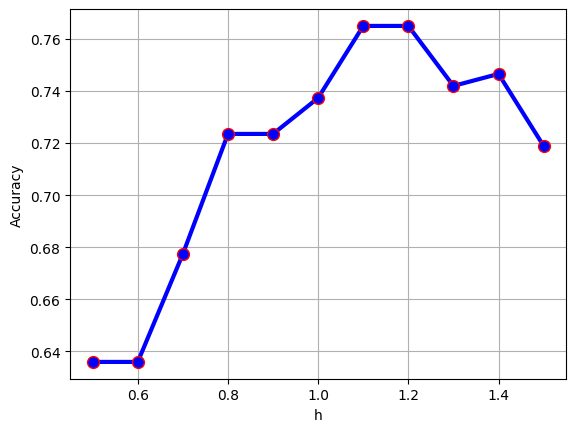

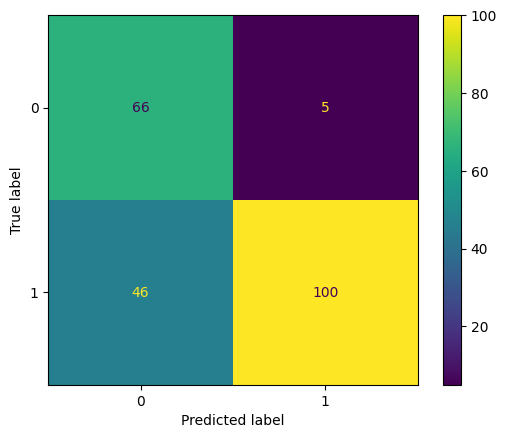

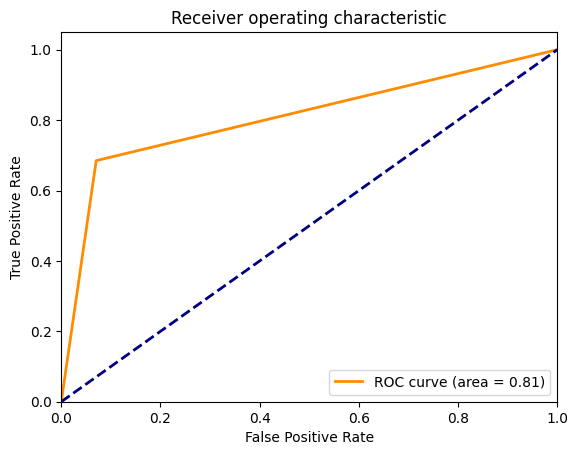

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.metrics import confusion_matrix

normal_data = pd.read_excel('/content/biodeg_normal.xlsx', engine='openpyxl').values

m, n = normal_data.shape
num_of_train = 837
num_of_test = m - num_of_train
data_train = normal_data[:num_of_train, :]
data_test = normal_data[num_of_train:, :]

p1 = np.zeros(num_of_test)
p2 = np.zeros(num_of_test)

class1_train = np.where(data_train[:, -1] == 1)[0]
class2_train = np.where(data_train[:, -1] == 2)[0]

class1_test = np.where(data_test[:, -1] == 1)[0]
class2_test = np.where(data_test[:, -1] == 2)[0]

N1 = len(class1_train)
N2 = len(class2_train)

N1_test = len(class1_test)
N2_test = len(class2_test)

data_class1_train = data_train[class1_train, :]
data_class2_train = data_train[class2_train, :]

d_t1 = np.zeros((num_of_test, 2))
d_t2 = np.zeros((num_of_test, 2))

h = np.arange(0.5, 1.6, 0.1)
acc = np.zeros(len(h))
MAR = np.zeros(len(h))
FAR = np.zeros(len(h))

for i in range(len(data_test)):
    if data_test[i, -1] == 1:
        d_t2[i, :] = [1, 0]
    elif data_test[i, -1] == 2:
        d_t2[i, :] = [0, 1]

for j in range(len(h)):
    for i in range(len(data_test)):
        p1[i] = parzen_Triangular(data_class1_train, data_test[i, :-1], n - 1, h[j], N1)
        p2[i] = parzen_Triangular(data_class2_train, data_test[i, :-1], n - 1, h[j], N2)

    for i in range(len(data_test)):
        if p1[i] > p2[i]:
            d_t1[i, :] = [1, 0]
        elif p2[i] > p1[i]:
            d_t1[i, :] = [0, 1]

    cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[1, 0]
    FN = cm[0, 1]

    acc[j] = (TP + TN) / (TP + TN + FP + FN)
    MAR[j] = TP / (TP + FN)
    FAR[j] = TN / (TN + FP)

h_acc = np.column_stack((h, acc))
best_acc = np.sort(acc)[-1]
best_h_pos = np.where(h_acc[:, 1] == best_acc)[0][0]
best_h = h_acc[best_h_pos, 0]

for i in range(len(data_test)):
    p1[i] = parzen_Triangular(data_class1_train, data_test[i, :-1], n - 1, best_h, N1)
    p2[i] = parzen_Triangular(data_class2_train, data_test[i, :-1], n - 1, best_h, N2)

for i in range(len(data_test)):
  h_acc = np.column_stack((h, acc))
  best_acc = np.sort(acc)[-1]

  best_h_pos = np.where(h_acc[:,1] == best_acc)[0][0]
  best_h = h_acc[best_h_pos,0]

for i in range(len(data_test)):
  p1[i] = parzen_Triangular(data_class1_train, data_test[i,:n-1], n-1, best_h, N1)
  p2[i] = parzen_Triangular(data_class2_train, data_test[i,:n-1], n-1, best_h, N2)

d_t1 = np.zeros((num_of_test, 2))
for i in range(len(data_test)):
  if p1[i] > p2[i]:
    d_t1[i,:] = [1, 0]
  if p2[i] > p1[i]:
    d_t1[i,:] = [0, 1]

plt.figure(1)
plt.plot(h, acc, '-bo', markeredgecolor='r', linewidth=3, markersize=8.5)
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Accuracy')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))

# Display confusion matrix
display = ConfusionMatrixDisplay(cm)
display.plot()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get ROC curve and AUC
fpr, tpr, thresholds = roc_curve(d_t2.argmax(axis=1), d_t1.argmax(axis=1))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
